In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

import sys

import perturbseq as perturb
import sc_eVIP

%matplotlib inline
import matplotlib.pyplot as plt

import sys 
import inspect
import seaborn as sns
import os

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis')
sc.logging.print_versions()

scanpy==1.5.1 anndata==0.7.1 umap==0.4.4 numpy==1.17.2 scipy==1.4.1 pandas==0.24.2 scikit-learn==0.22 statsmodels==0.11.0 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.8.1


In [2]:
PROTEIN='KRAS'
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14'
SUBSAMPLED=DATA+'/'+PROTEIN+'/subsampled/A549.'+PROTEIN

counts=20000

FIGS=DATA+'/2021-03-22_Figures/'
os.system('mkdir -p '+FIGS)
print(FIGS)

sc.settings.figdir=FIGS

/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2021-03-22_Figures/


In [3]:
adata=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.regress_out_vbc.analysis.1000cells.new_format.2021-03-23.h5ad',
             cache=False)
adata


Only considering the two last: ['.2021-03-23', '.h5ad'].
Only considering the two last: ['.2021-03-23', '.h5ad'].


AnnData object with n_obs × n_vars = 90262 × 1145 
    obs: 'batch', 'known', 'n_counts', 'n_genes', 'percent_mito', 'n_counts_downsampled', 'n_counts_original', 'vbc.counts', 'batch_num4', 'batch_num7', 'batch_num11', 'batch_num8', 'batch_num13', 'batch_num23', 'batch_num9', 'batch_num2', 'batch_num24', 'batch_num10', 'batch_num12', 'batch_num16', 'batch_num20', 'batch_num18', 'batch_num25', 'batch_num31', 'batch_num28', 'batch_num5', 'batch_num14', 'batch_num15', 'batch_num29', 'batch_num3', 'batch_num6', 'batch_num22', 'batch_num26', 'batch_num17', 'batch_num27', 'batch_num1', 'batch_num19', 'batch_num21', 'batch_num0', 'batch_num30', 'louvain', 'guide', 'A146P', 'K117R', 'Y166H', 'K169K', 'K178K', 'T50P', 'A146V', 'L52F', 'K176Q', 'A155G', 'G60D', 'T158T', 'K88K', 'D119G', 'L159S', 'G13V', 'Q61P', 'D33E', 'S136N', 'K179R', 'T74T', 'G60S', 'Q99E', 'G13R', 'G12D', 'R164Q', 'I36M', 'C185Y', 'I163S', 'P34R', 'G60V', 'G12A', 'K117N', 'T158A', 'G12I', 'T74A', 'K5E', 'P34L', 'A59E', 'A146

In [4]:
counts=np.exp(adata.raw.X.toarray())-1
adata_counts=sc.AnnData(pd.DataFrame(counts,index=adata.obs_names,
                                     columns=adata.raw.var_names))
adata_counts.obs['variant']=adata.obs['variant']
adata_counts.obs['batch']=adata.obs['batch']
adata_counts

AnnData object with n_obs × n_vars = 90262 × 24482 
    obs: 'variant', 'batch'

In [56]:
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2021-02-01'

rnaseq=pd.read_csv(DATA+'/data/rnaseq/RNAseq.2021-02-09.transcript_quants_log2TPM_KRAS-TP53.csv',
                  index_col=0)
rnaseq=rnaseq.loc[:,[x for x in rnaseq.columns if 'KRAS' in x]]
rnaseq.head()

,KRAS_p.G12C_J17_C4_S5,KRAS_p.G12C_J17_C10_S5,KRAS_p.G12V_E15_OE015_x5_S4,KRAS_p.G12V_E15_OE015_x6_S4,KRAS_p.G12C_J17_OE014_x7_S3,KRAS_p.G12C_J17_OE014_x8_S3,KRAS_p.G12V_E15_0E015_x2_B2,KRAS_p.G12V_E15_0E015_x3_B8,KRAS_WT_A21_E1,KRAS_WT_B21_G1,KRAS_WT_B22_H1,KRAS_p.G12V_E21_E4,KRAS_p.G12V_E22_F4,KRAS_p.G12V_F21_G4,KRAS_p.G12V_F22_H4
WASH7P,0.668737,0.675460,0.007455,0.634937,0.821055,1.080422,0.441759,1.270176,0.564305,-0.180887,0.355750,1.620081,1.557770,1.500172,1.372041
MIR6723,9.420625,9.303179,9.588434,9.231622,9.071537,9.239222,10.116811,9.794639,9.831564,9.254427,9.760818,8.781917,7.235907,7.966014,7.090864
LOC100288069,0.740261,0.457478,0.334992,0.599904,0.573789,0.012765,-1.084739,1.158715,0.725377,-0.742282,1.379318,0.528172,0.493875,0.823301,1.810647
LINC01128,0.086265,0.054195,0.528165,0.301498,0.421148,0.314261,-0.376595,0.413687,-0.721711,-1.156203,-1.134139,-0.148783,0.619113,0.316270,1.011436
LOC100130417,-2.154855,-1.885097,-inf,0.802102,-0.776730,-0.315728,-inf,-0.868733,0.293756,-1.299434,0.915275,-0.613942,-inf,-inf,-inf


In [57]:
np.sum(rnaseq==np.inf)

KRAS_p.G12C_J17_C4_S5          0
KRAS_p.G12C_J17_C10_S5         0
KRAS_p.G12V_E15_OE015_x5_S4    0
KRAS_p.G12V_E15_OE015_x6_S4    0
KRAS_p.G12C_J17_OE014_x7_S3    0
KRAS_p.G12C_J17_OE014_x8_S3    0
KRAS_p.G12V_E15_0E015_x2_B2    0
KRAS_p.G12V_E15_0E015_x3_B8    0
KRAS_WT_A21_E1                 0
KRAS_WT_B21_G1                 0
KRAS_WT_B22_H1                 0
KRAS_p.G12V_E21_E4             0
KRAS_p.G12V_E22_F4             0
KRAS_p.G12V_F21_G4             0
KRAS_p.G12V_F22_H4             0
dtype: int64

In [58]:
np.sum(rnaseq==-np.inf)

KRAS_p.G12C_J17_C4_S5           72
KRAS_p.G12C_J17_C10_S5          62
KRAS_p.G12V_E15_OE015_x5_S4    288
KRAS_p.G12V_E15_OE015_x6_S4    143
KRAS_p.G12C_J17_OE014_x7_S3     54
KRAS_p.G12C_J17_OE014_x8_S3     53
KRAS_p.G12V_E15_0E015_x2_B2    181
KRAS_p.G12V_E15_0E015_x3_B8     73
KRAS_WT_A21_E1                  94
KRAS_WT_B21_G1                 378
KRAS_WT_B22_H1                 231
KRAS_p.G12V_E21_E4             413
KRAS_p.G12V_E22_F4             108
KRAS_p.G12V_F21_G4             128
KRAS_p.G12V_F22_H4             103
dtype: int64

In [59]:
#log1p
rnaseq[rnaseq!=np.inf]=np.power(2,rnaseq[rnaseq!=np.inf])
rnaseq[rnaseq==np.inf]=0

In [60]:
rnaseq.sum().sort_values()

KRAS_p.G12V_E21_E4             9.545012e+05
KRAS_p.G12V_E15_OE015_x5_S4    9.617117e+05
KRAS_p.G12V_F22_H4             9.671107e+05
KRAS_WT_A21_E1                 9.700867e+05
KRAS_p.G12C_J17_OE014_x7_S3    9.708314e+05
KRAS_p.G12C_J17_OE014_x8_S3    9.711893e+05
KRAS_p.G12V_E22_F4             9.719509e+05
KRAS_WT_B22_H1                 9.722295e+05
KRAS_p.G12V_F21_G4             9.749293e+05
KRAS_p.G12C_J17_C10_S5         9.756966e+05
KRAS_p.G12C_J17_C4_S5          9.772244e+05
KRAS_p.G12V_E15_0E015_x2_B2    9.939129e+05
KRAS_p.G12V_E15_0E015_x3_B8    1.004741e+06
KRAS_WT_B21_G1                 1.007597e+06
KRAS_p.G12V_E15_OE015_x6_S4    1.007960e+06
dtype: float64

KRAS_WT_B21_G1                 22667.156145
KRAS_WT_B22_H1                 22894.103510
KRAS_WT_A21_E1                 24115.657533
KRAS_p.G12V_E15_OE015_x5_S4    25702.365274
KRAS_p.G12C_J17_C4_S5          25772.399052
KRAS_p.G12V_E15_0E015_x2_B2    25824.716762
KRAS_p.G12C_J17_C10_S5         25949.296776
KRAS_p.G12C_J17_OE014_x7_S3    26103.984007
KRAS_p.G12V_E15_0E015_x3_B8    26395.266490
KRAS_p.G12C_J17_OE014_x8_S3    26805.632702
KRAS_p.G12V_E21_E4             27076.110266
KRAS_p.G12V_E15_OE015_x6_S4    27102.055973
KRAS_p.G12V_F21_G4             27660.057334
KRAS_p.G12V_E22_F4             30502.799168
KRAS_p.G12V_F22_H4             31131.361769
dtype: float64

In [9]:
c=0
for col in rnaseq.columns:
    if 'G12V' in col:
        c+=1
print('G12V',c)

c=0
for col in rnaseq.columns:
    if 'G12C' in col:
        c+=1
print('G12C',c)

c=0
for col in rnaseq.columns:
    if 'WT' in col:
        c+=1
print('WT',c)

G12V 8
G12C 4
WT 3


In [10]:
rnadata=sc.AnnData(rnaseq).T
print(rnadata)

#annotate conditions
import re
conditions=[]
for i in range(rnadata.n_obs):
    obs=rnadata.obs_names[i]
    condition=re.sub('p.','',obs.split('_')[1])
    conditions.append(condition)
rnadata.obs['variant']=list(conditions)
rnadata.obs['rep']=rnadata.obs_names

print(rnadata)

AnnData object with n_obs × n_vars = 15 × 12468 
AnnData object with n_obs × n_vars = 15 × 12468 
    obs: 'variant', 'rep'


In [13]:
var_genes=list(set(adata.var_names).intersection(rnadata.var_names))
print(len(var_genes))

1037


In [20]:
perturb.tl.bulk(adata_counts,'variant')

In [23]:
adata_counts.uns['bulk.variant'].shape

(100, 24482)

In [75]:
evip_var=sc.AnnData(adata_counts.uns['bulk.variant'].loc[:,var_genes])
evip_var.obs['variant']=list(adata_counts.uns['bulk.variant'].index)
rnadata_var=rnadata[:,var_genes]

In [76]:
sc.pp.scale(evip_var,max_value=10)
sc.pp.scale(rnadata_var,max_value=10)

/ahg/regevdata/users/oursu/software/anaconda3/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:848: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [77]:
#compare all evip pairs

def compare_vectors(xvals,yvals,xname='x',yname='y',plot=True):
    
    from scipy.stats import spearmanr,pearsonr
    from scipy.spatial import distance
    s,ps=spearmanr(xvals,yvals)
    p,pp=pearsonr(xvals,yvals)
    d=distance.cityblock(xvals,yvals)
    
    if plot:
        plt.scatter(xvals,
                    yvals,
                    alpha=0.1,s=1,color='black')
        plt.grid(False)
        plt.xlabel(xname)
        plt.ylabel(yname)
        plt.title('\nSpearman: '+str(np.round(s,3))+'\nPearson: '+str(np.round(p,3)))
        plt.show()
    
    return(s,p,d)

vs=['WT','G12C','G12V']
d1=evip_var
d2=rnadata_var

cols1=[c for c in d1.obs_names if str(d1.obs['variant'].loc[c]) in vs]
cols2=[c for c in d2.obs_names if str(d2.obs['variant'].loc[c]) in vs]

rep_df=pd.DataFrame(index=cols1,columns=cols2)

rep_sp=[]
rep_p=[]
between_sp=[]
between_p=[]
rep_d=[]
between_d=[]
for r1 in cols1:
    print(r1)
    for r2 in cols2:
        a=d1[r1,].X.flatten()
        b=d2[r2,].X.flatten()
        sp,p,d=compare_vectors(a,b,plot=False,xname=r1,yname=r2)
        if d1.obs['variant'].loc[r1]==d2.obs['variant'].loc[r2]:
            rep_sp.append(sp)
            rep_p.append(p)
            rep_d.append(d)
        else:
            between_sp.append(sp)
            between_p.append(p)
            between_d.append(d)
        rep_df.loc[r1,r2]=sp
        
rep_df=rep_df.astype(float)

G12V
G12C
WT


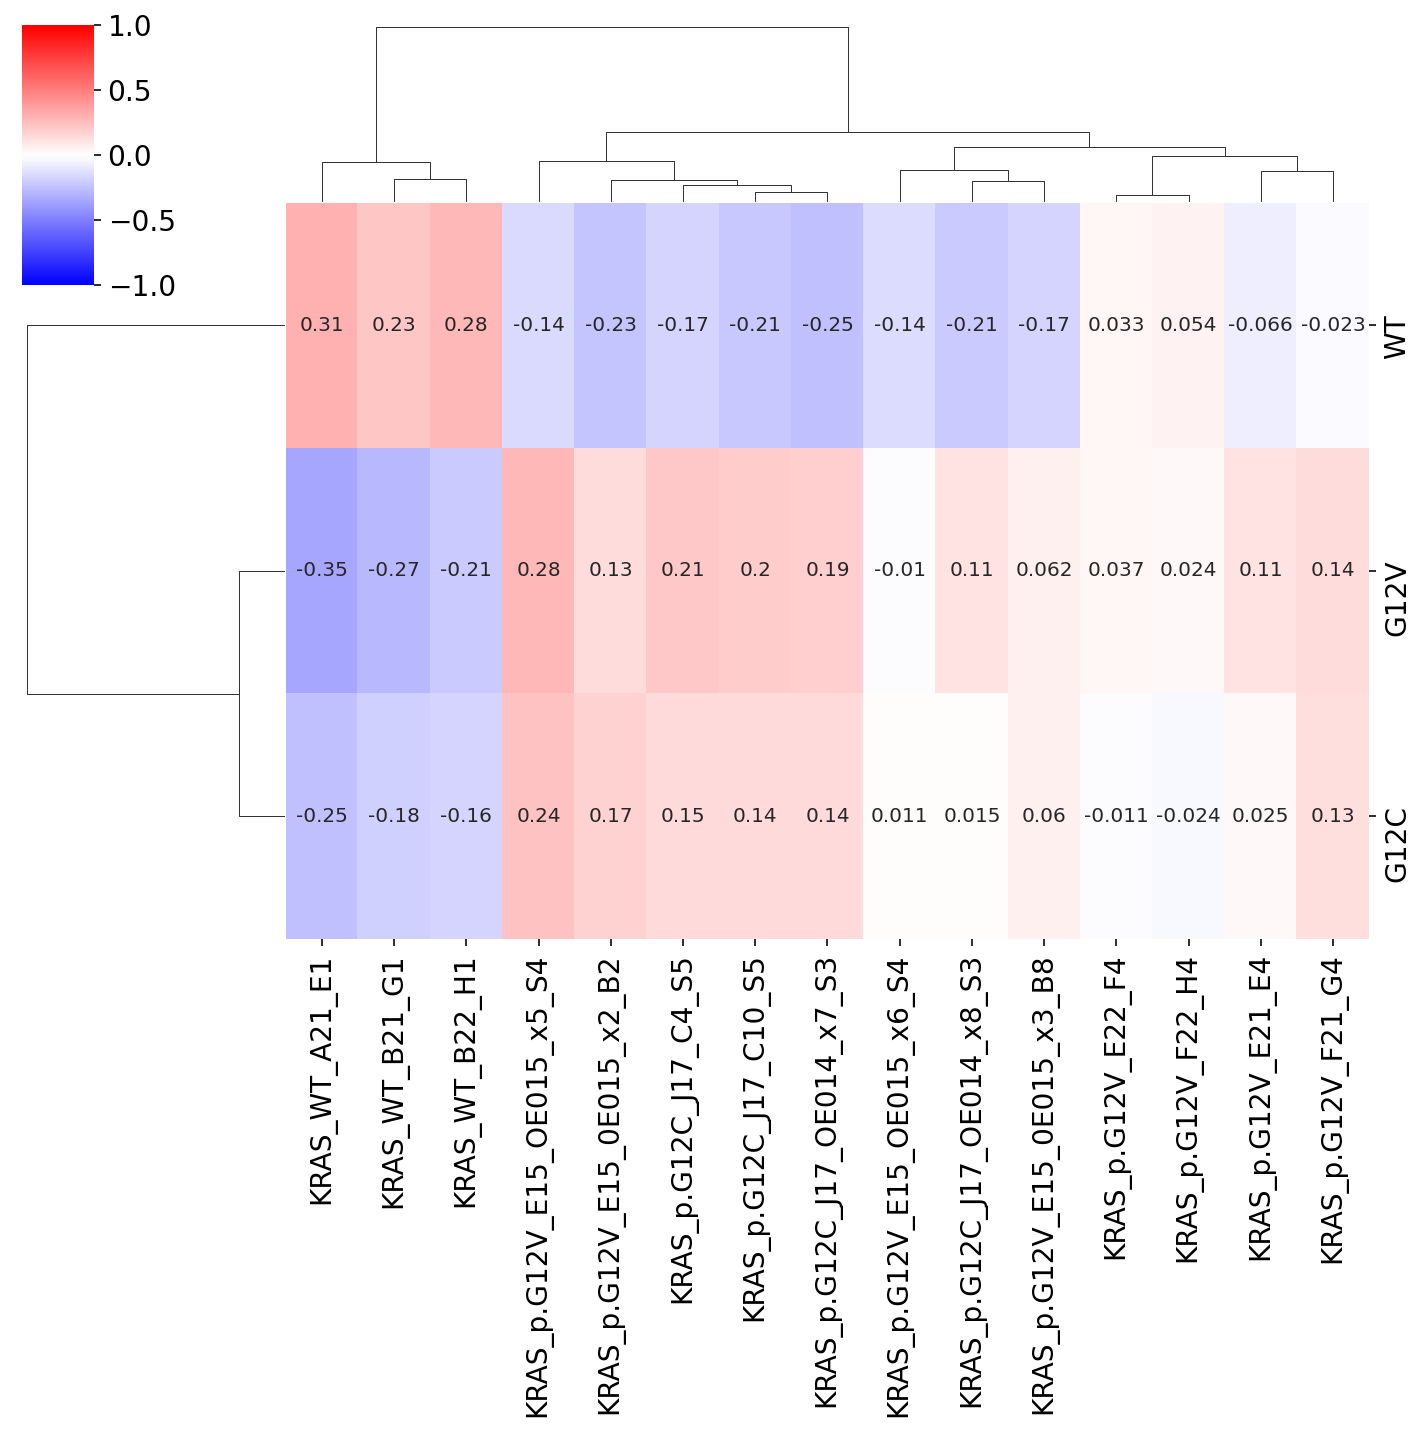

In [78]:
x=1
sns.clustermap(rep_df,annot=True,
               cmap='bwr',vmin=-x,vmax=x,
              )

In [67]:
df=pd.DataFrame({'condition':'rep',
                'corr':rep_sp})
df=pd.concat([df,
             pd.DataFrame({'condition':'between',
                'corr':between_sp})])

(-0.5, 0.5)

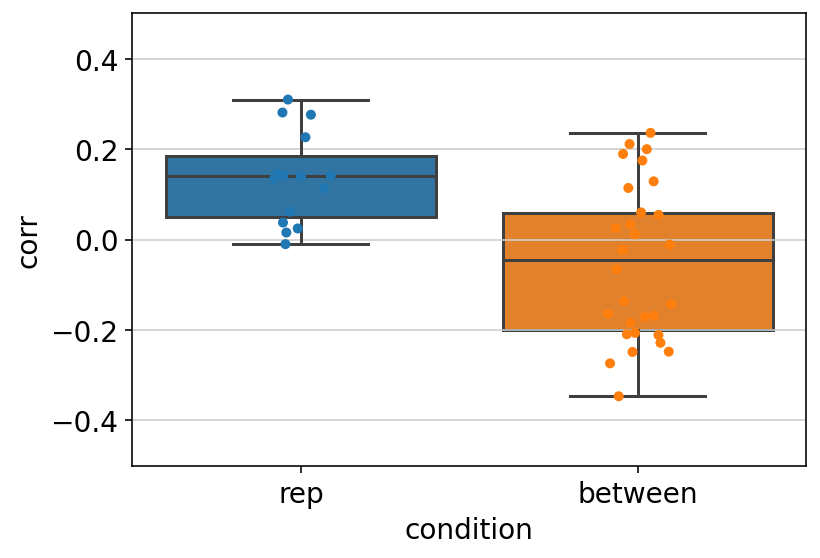

In [70]:
fig,plots=plt.subplots(1)

sns.boxplot(data=df,x='condition',y='corr',ax=plots)
sns.stripplot(data=df,x='condition',y='corr',ax=plots)
plots.set_ylim(-0.5,0.5)

In [98]:
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2021-02-01'

rnaseq=pd.read_csv(DATA+'/data/rnaseq/rawcounts_KRAS-TP53.csv',
                  index_col=0)
#convert to TPM
for c in rnaseq.columns:
    rnaseq[c] = rnaseq[c]/rnaseq[c].sum()*1000000
controls=rnaseq.loc[:,[x for x in rnaseq.columns if 'EMPTY' in x]]
rnaseq=rnaseq.loc[:,[x for x in rnaseq.columns if 'KRAS' in x]]
rnaseq.head()

,KRAS_WT_A21_E1,KRAS_WT_B21_G1,KRAS_WT_B22_H1,KRAS_p.G12V_E21_E4,KRAS_p.G12V_E22_F4,KRAS_p.G12V_F21_G4,KRAS_p.G12V_F22_H4,KRAS_p.G12V_E15_0E015_x2_B2,KRAS_p.G12V_E15_0E015_x3_B8,KRAS_p.G12C_J17_OE014_x7_S3,KRAS_p.G12C_J17_OE014_x8_S3,KRAS_p.G12V_E15_OE015_x5_S4,KRAS_p.G12V_E15_OE015_x6_S4,KRAS_p.G12C_J17_C4_S5,KRAS_p.G12C_J17_C10_S5
DDX11L1,0.000000,0.000000,0.000000,0.000000,0.000000,0.215925,0.066878,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WASH7P,1.482786,0.973245,1.299364,2.863234,2.787868,2.807031,2.407599,1.419601,2.700515,1.883701,2.182653,0.873757,1.561217,2.457096,2.467373
MIR6859-3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MIR6859-2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MIR6859-4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [99]:
rnaseq.columns

Index(['KRAS_WT_A21_E1', 'KRAS_WT_B21_G1', 'KRAS_WT_B22_H1',
       'KRAS_p.G12V_E21_E4', 'KRAS_p.G12V_E22_F4', 'KRAS_p.G12V_F21_G4',
       'KRAS_p.G12V_F22_H4', 'KRAS_p.G12V_E15_0E015_x2_B2',
       'KRAS_p.G12V_E15_0E015_x3_B8', 'KRAS_p.G12C_J17_OE014_x7_S3',
       'KRAS_p.G12C_J17_OE014_x8_S3', 'KRAS_p.G12V_E15_OE015_x5_S4',
       'KRAS_p.G12V_E15_OE015_x6_S4', 'KRAS_p.G12C_J17_C4_S5',
       'KRAS_p.G12C_J17_C10_S5'],
      dtype='object')

In [100]:
controls.columns

Index(['A549_EMPTY_C11_A2', 'A549_EMPTY_C12_B2', 'A549_EMPTY_D11_C2',
       'A549_EMPTY_D12_D2', 'EMPTY_C18_0E015_x2_A6', 'EMPTY_C21_0E015_x2_B6',
       'EMPTY_D20_0E015_x2_C6', 'EMPTY_D23_0E015_x2_D6',
       'EMPTY_G17_0E015_x2_E6', 'EMPTY_G22_0E015_x2_F6',
       'EMPTY_C18_0E015_x3_A12', 'EMPTY_C21_0E015_x3_B12',
       'EMPTY_D20_0E015_x3_C12', 'EMPTY_D23_0E015_x3_D12',
       'EMPTY_G17_0E015_x3_E12', 'EMPTY_G22_0E015_x3_F12',
       'EMPTY_D19_OE014_x7_S3', 'EMPTY_D20_OE014_x7_S3',
       'EMPTY_D19_OE014_x8_S3', 'EMPTY_D20_OE014_x8_S3',
       'EMPTY_C18_OE015_x5_S4', 'EMPTY_C21_OE015_x5_S4',
       'EMPTY_D20_OE015_x5_S4', 'EMPTY_D23_OE015_x5_S4',
       'EMPTY_G17_OE015_x5_S4', 'EMPTY_G22_OE015_x5_S4',
       'EMPTY_C18_OE015_x6_S4', 'EMPTY_D20_OE015_x6_S4',
       'EMPTY_G17_OE015_x6_S4', 'EMPTY_G22_OE015_x6_S4', 'EMPTY_D19_D2_S5',
       'EMPTY_D20_E2_S5', 'EMPTY_D19_D8_S5', 'EMPTY_D20_E8_S5'],
      dtype='object')

In [101]:
rnaseq[rnaseq!=np.inf]=np.log1p(rnaseq[rnaseq!=np.inf])
rnaseq[rnaseq==np.inf]=0

In [102]:
controls[controls!=np.inf]=np.log1p(controls[controls!=np.inf])
controls[controls==np.inf]=0

In [103]:
rnadata=sc.AnnData(rnaseq).T
print(rnadata)

#annotate conditions
import re
conditions=[]
for i in range(rnadata.n_obs):
    obs=rnadata.obs_names[i]
    condition=re.sub('p.','',obs.split('_')[1])
    conditions.append(condition)
rnadata.obs['variant']=list(conditions)
rnadata.obs['rep']=rnadata.obs_names

print(rnadata)

AnnData object with n_obs × n_vars = 15 × 26364 
AnnData object with n_obs × n_vars = 15 × 26364 
    obs: 'variant', 'rep'


In [107]:
control_mean=controls.mean(axis=1)
control_sd=controls.mean(axis=1)
control_sd[control_sd==0]=1

In [108]:
x=rnadata.X
for i in range(x.shape[0]):
    x[i,:]=np.divide(x[i,:]-control_mean,control_sd)

In [109]:
rnadata.X=x

In [110]:
var_genes=list(set(adata.var_names).intersection(rnadata.var_names))
print(len(var_genes))

1087


In [111]:
rnadata_var=rnadata[:,var_genes]

In [153]:
adata_counts_log1p=sc.pp.log1p(adata_counts)

KeyboardInterrupt: 

In [123]:
evip=sc.AnnData(adata_counts.uns['bulk.variant'])

In [138]:
unassigned_mean=adata_counts[adata_counts.obs['variant']=='unassigned',:].X.mean(axis=0)
unassigned_sd=np.array(adata_counts[adata_counts.obs['variant']=='unassigned',:].X.std(axis=0))
unassigned_sd[unassigned_sd==0]=1

In [139]:
y=evip.X
for i in range(y.shape[0]):
    y[i,:]=np.divide(y[i,:]-unassigned_mean,unassigned_sd)
evip.X=y

In [140]:
evip_var=evip[:,var_genes]
evip_var.obs['variant']=list(adata_counts.uns['bulk.variant'].index)

Trying to set attribute `.obs` of view, copying.


In [144]:
rnadata_var.X

ArrayView([[-1.0030353 , -1.242322  , -1.0225291 , ..., -0.9920444 ,
            -0.98074406, -1.03262   ],
           [-1.0000862 , -1.4191927 , -1.0269101 , ..., -1.0082995 ,
            -0.98093116, -1.0204086 ],
           [-1.002238  , -1.4935738 , -1.0295206 , ..., -1.0278596 ,
            -0.9803726 , -1.017544  ],
           ...,
           [-0.99991983, -0.83528286, -1.0160383 , ..., -1.011477  ,
            -1.0298264 , -1.007655  ],
           [-1.0025499 , -0.6996505 , -1.0110698 , ..., -1.0337358 ,
            -1.0142995 , -1.0233171 ],
           [-1.0032518 , -0.48586974, -1.0079589 , ..., -1.0385264 ,
            -1.0109324 , -1.0185355 ]], dtype=float32)

In [148]:
#compare all evip pairs

def compare_vectors(xvals,yvals,xname='x',yname='y',plot=True):
    
    from scipy.stats import spearmanr,pearsonr
    from scipy.spatial import distance
    s,ps=spearmanr(xvals,yvals,nan_policy='omit')
    #p,pp=pearsonr(xvals,yvals)
    d=distance.cityblock(xvals,yvals)
    p=0
    
    if plot:
        plt.scatter(xvals,
                    yvals,
                    alpha=0.1,s=1,color='black')
        plt.grid(False)
        plt.xlabel(xname)
        plt.ylabel(yname)
        #plt.title('\nSpearman: '+str(np.round(s,3))+'\nPearson: '+str(np.round(p,3)))
        plt.show()
    
    return(s,p,d)

vs=['WT','G12C','G12V']
d1=evip_var
d2=rnadata_var

cols1=[c for c in d1.obs_names if str(d1.obs['variant'].loc[c]) in vs]
cols2=[c for c in d2.obs_names if str(d2.obs['variant'].loc[c]) in vs]

rep_df=pd.DataFrame(index=cols1,columns=cols2)

rep_sp=[]
rep_p=[]
between_sp=[]
between_p=[]
rep_d=[]
between_d=[]
for r1 in cols1:
    print(r1)
    for r2 in cols2:
        a=d1[r1,].X.flatten()
        b=d2[r2,].X.flatten()
        sp,p,d=compare_vectors(a,b,plot=False,xname=r1,yname=r2)
        if d1.obs['variant'].loc[r1]==d2.obs['variant'].loc[r2]:
            rep_sp.append(sp)
            rep_p.append(p)
            rep_d.append(d)
        else:
            between_sp.append(sp)
            between_p.append(p)
            between_d.append(d)
        rep_df.loc[r1,r2]=sp
        
rep_df=rep_df.astype(float)

G12V
G12C
WT


In [149]:
rep_df

,KRAS_WT_A21_E1,KRAS_WT_B21_G1,KRAS_WT_B22_H1,KRAS_p.G12V_E21_E4,KRAS_p.G12V_E22_F4,KRAS_p.G12V_F21_G4,KRAS_p.G12V_F22_H4,KRAS_p.G12V_E15_0E015_x2_B2,KRAS_p.G12V_E15_0E015_x3_B8,KRAS_p.G12C_J17_OE014_x7_S3,KRAS_p.G12C_J17_OE014_x8_S3,KRAS_p.G12V_E15_OE015_x5_S4,KRAS_p.G12V_E15_OE015_x6_S4,KRAS_p.G12C_J17_C4_S5,KRAS_p.G12C_J17_C10_S5
G12V,0.187186,0.224518,0.190681,0.290720,0.187475,0.269797,0.131656,0.267505,0.195372,0.203258,0.188559,0.357278,0.235213,0.216253,0.186260
G12C,0.195117,0.222749,0.201936,0.208526,0.099116,0.186357,0.064758,0.171571,0.130921,0.133941,0.100875,0.265293,0.150077,0.153483,0.114872
WT,0.051951,0.080150,0.121146,-0.158248,-0.249763,-0.190092,-0.277169,-0.234421,-0.315142,-0.303649,-0.344427,-0.143079,-0.261158,-0.279415,-0.296792


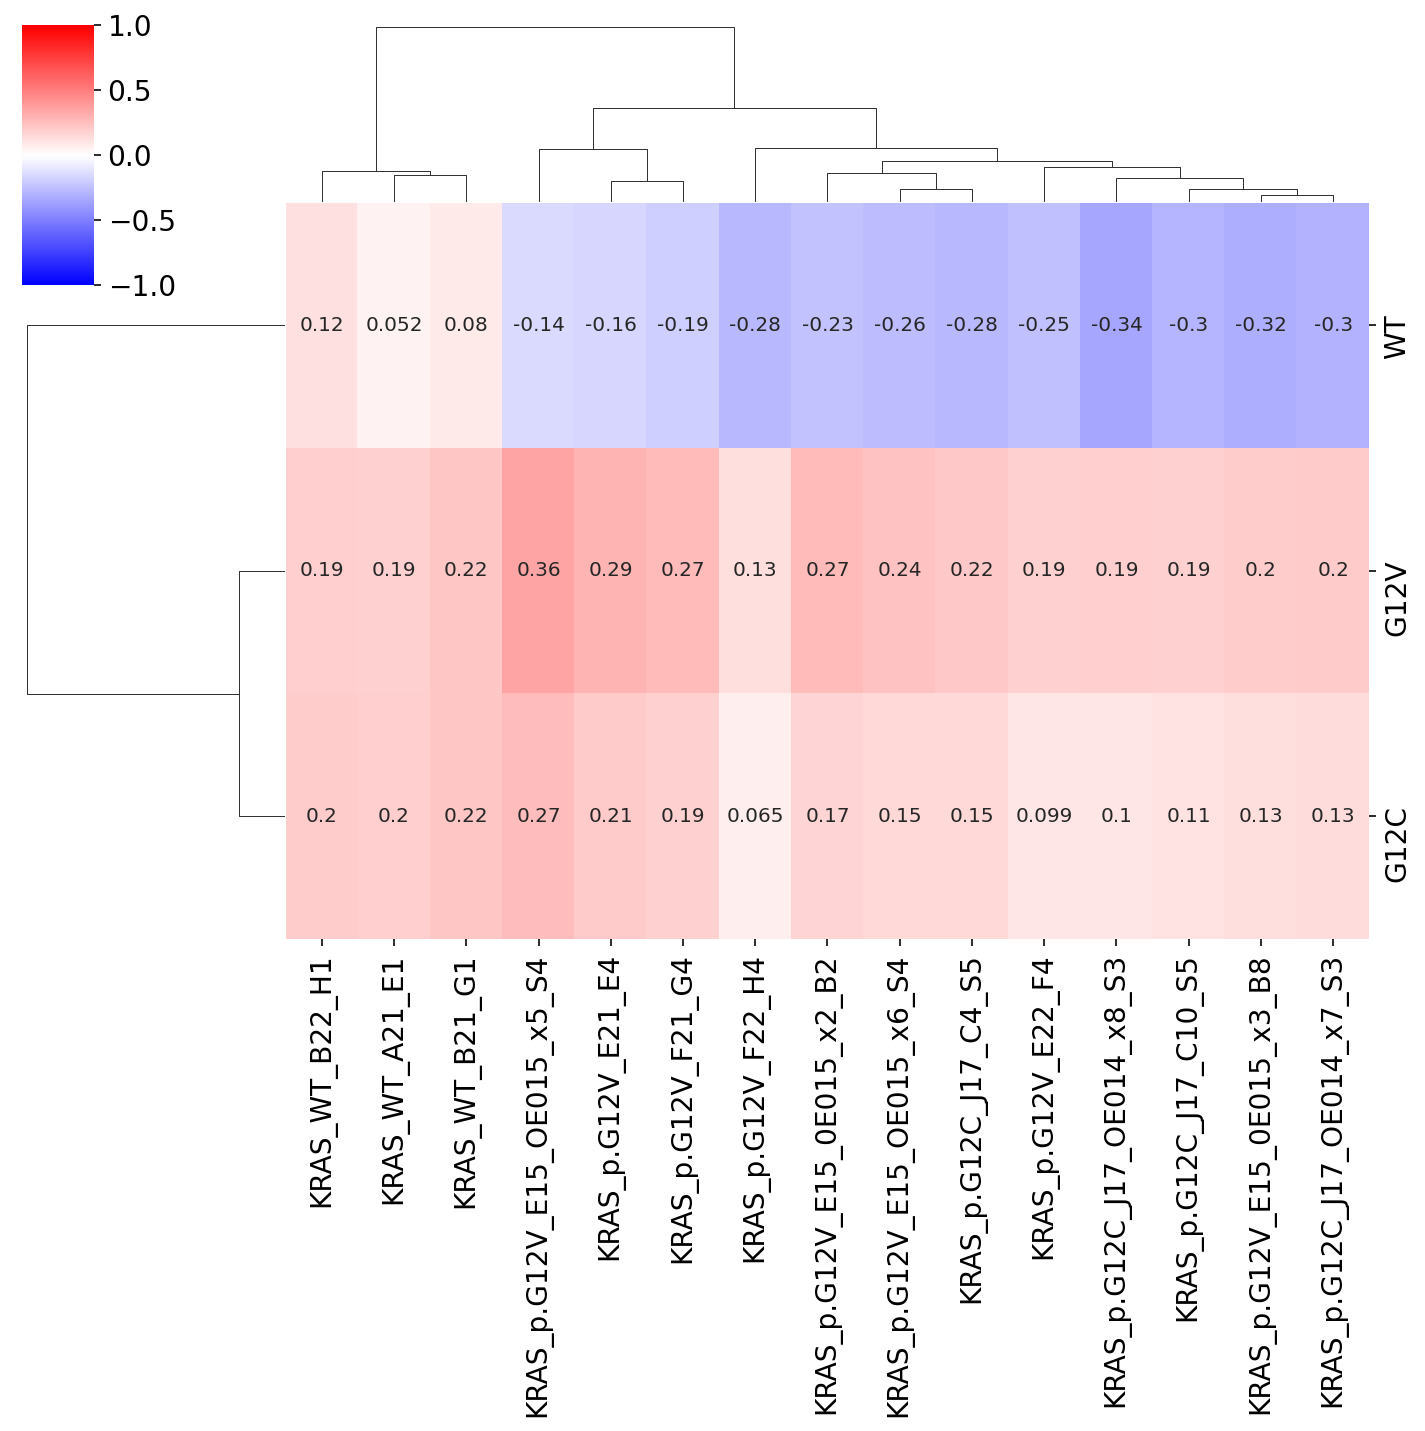

In [150]:
x=1
sns.clustermap(rep_df,annot=True,
               cmap='bwr',vmin=-x,vmax=x,
              )

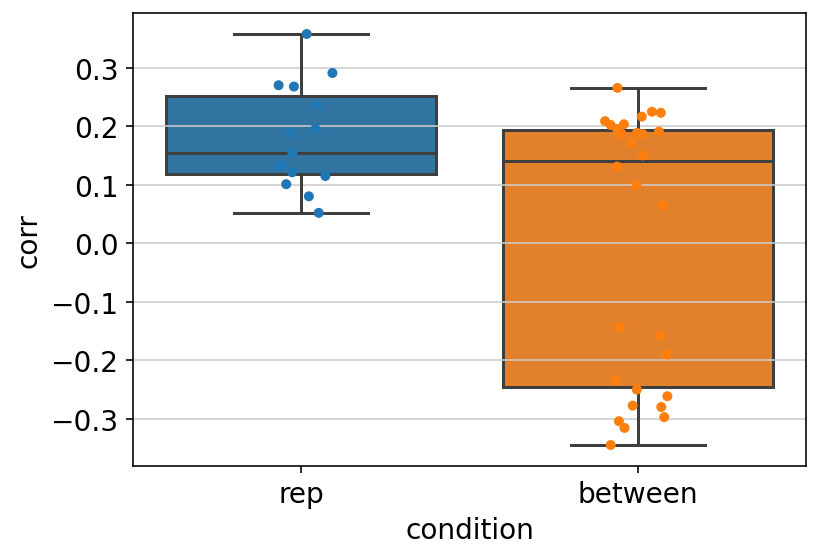

In [152]:
df=pd.DataFrame({'condition':'rep',
                'corr':rep_sp})
df=pd.concat([df,
             pd.DataFrame({'condition':'between',
                'corr':between_sp})])

fig,plots=plt.subplots(1)

sns.boxplot(data=df,x='condition',y='corr',ax=plots)
sns.stripplot(data=df,x='condition',y='corr',ax=plots)
#plots.set_ylim(-0.5,0.5)

In [22]:
#t-tests
#go gene by gene and get the DE genes

from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

def test_across_genes(data1_df,data2_df,test='t-test',ps=1e-10,eps=1e-6):

    data1=np.array(data1_df)
    data2=np.array(data2_df)
    
    #check same numbers of genes for the 2 groups
    assert data1.shape[1]==data2.shape[1]
    num_genes=data1.shape[1]

    #get means, differences and log2 ratios
    X1_means=np.mean(data1,axis=0)
    X2_means=np.mean(data2,axis=0)
    differences=X1_means-X2_means
    ##log2_ratios=np.log2(X1_means+pseudocount)-np.log2(X2_means+pseudocount)

    pvals=[]
    for gene_idx in range(num_genes):
        
        #if gene_idx%1000==0:
        #    perturbseq.utils.display_progress(gene_idx,num_genes)

        X_1=data1[:,gene_idx]
        X_2=data2[:,gene_idx]
        
        if (X_1.sum()==0.0 and X_2.sum()==0.0) or (X_1.std()<eps and X_2.std()<eps):
            pvals.append(1.0) #everything is 0, give the worst p-value
            continue
        #print(gene_idx)
        if test=='Mann-Whitney':
            u,p=mannwhitneyu(X_1,X_2,alternative='two-sided')
        if test=='t-test':
            t,p=ttest_ind(X_1,X_2)
        #print(gene_idx,p,X_1.sum(),X_2.sum(),X_2)
            
        pvals.append(p)
        
    from statsmodels.stats.multitest import multipletests
    pvals=multipletests(pvals, alpha=0.05, method='fdr_bh')[1]
        
    #put together result
    results=pd.DataFrame({'condition1_mean':X1_means,
                          'condition2_mean':X2_means,
                          'difference':differences,
                          ##'log2_ratio':log2_ratios,
                          'p':np.multiply(-np.log10(np.array(pvals)+ps),np.sign(differences))},
                         index=data1_df.columns)
    return(results)

In [55]:
v='G12C'
test='t-test'

data1=pd.DataFrame(rnadata[rnadata.obs['variant']==v,:].X,
                      columns=rnadata.var_names)
data2=pd.DataFrame(rnadata[rnadata.obs['variant']=='WT',:].X,
                  columns=rnadata.var_names)
shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
data1=data1.loc[:,shared_genes]
data2=data2.loc[:,shared_genes]
rna_res=test_across_genes(data1,data2,test=test)

In [56]:
data1=pd.DataFrame(adata[adata.obs['variant']==v,:].raw.X.toarray(),
                  columns=adata.raw.var_names)
data2=pd.DataFrame(adata[adata.obs['variant']=='WT',:].raw.X.toarray(),
                  columns=adata.raw.var_names)
shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
data1=data1.loc[:,shared_genes]
data2=data2.loc[:,shared_genes]
evip_res=test_across_genes(data1,data2,test=test)

In [57]:
data1=pd.DataFrame(adata[adata.obs['variant']==v,:].X.toarray(),
                  columns=adata.var_names)
data2=pd.DataFrame(adata[adata.obs['variant']=='WT',:].X.toarray(),
                  columns=adata.var_names)
shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
data1=data1.loc[:,shared_genes]
data2=data2.loc[:,shared_genes]
evip_res=test_across_genes(data1,data2,test=test)

In [58]:
comparison_genes=list(set(rna_res.index).intersection(set(evip_res.index)))
print(len(comparison_genes))

1037


In [59]:
cells_detected=np.sum(adata.raw[:,comparison_genes].X.toarray()>0.0,axis=0)
print(cells_detected.shape)

(1037,)


Text(0.5, 1.0, 'G12C\nSpearman: 0.4\np :1.8357729303847988e-31\nPearson: 0.4\np :4.7489933336957134e-36')

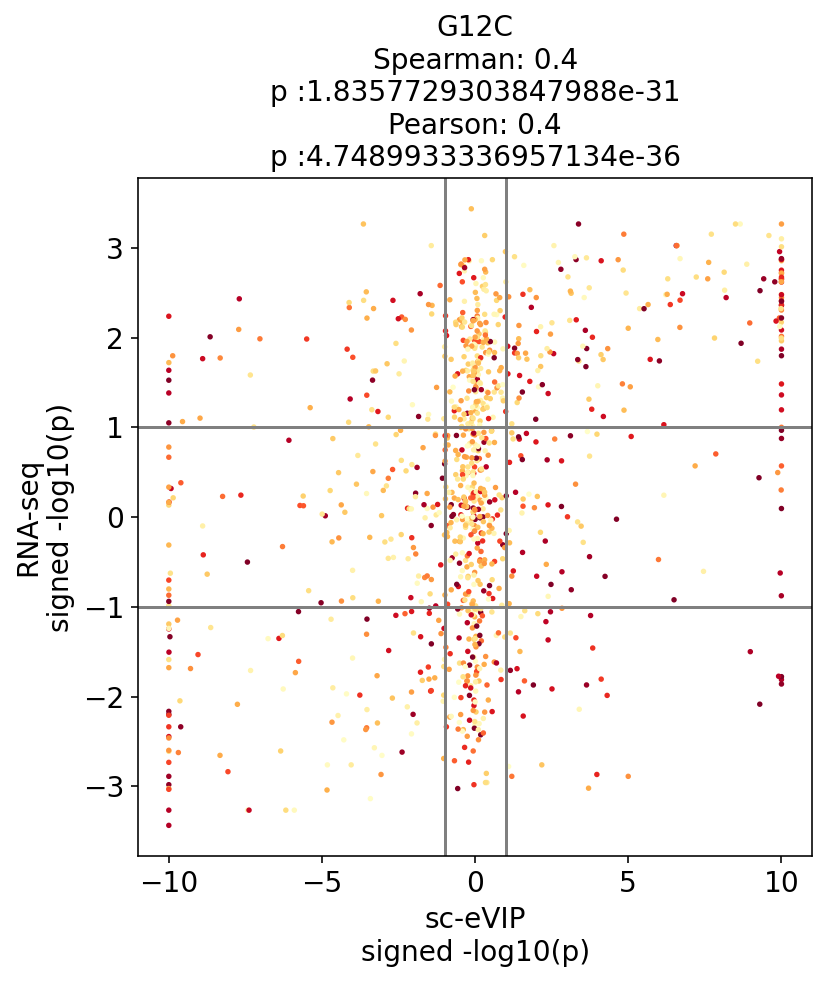

In [60]:
fig,plots=plt.subplots(1)
fig.set_size_inches(6,6)

plots.scatter(evip_res.loc[comparison_genes,'p'],
           rna_res.loc[comparison_genes,'p'],s=3,
           c=cells_detected,cmap='YlOrRd')
plt.grid(False)

plt.axvline(x=-1,color='gray')
plt.axhline(y=-1,color='gray')
plt.axvline(x=1,color='gray')
plt.axhline(y=1,color='gray')

from scipy.stats import spearmanr,pearsonr
s,ps=spearmanr(evip_res.loc[comparison_genes,'p'],rna_res.loc[comparison_genes,'p'])
p,pp=pearsonr(evip_res.loc[comparison_genes,'p'],rna_res.loc[comparison_genes,'p'])

plots.set_xlabel('sc-eVIP\nsigned -log10(p)')
plots.set_ylabel('RNA-seq\nsigned -log10(p)')
plots.set_title(v+'\nSpearman: '+str(np.round(s,1))+'\np :'+str(ps)+'\nPearson: '+str(np.round(p,1))+'\np :'+str(pp))


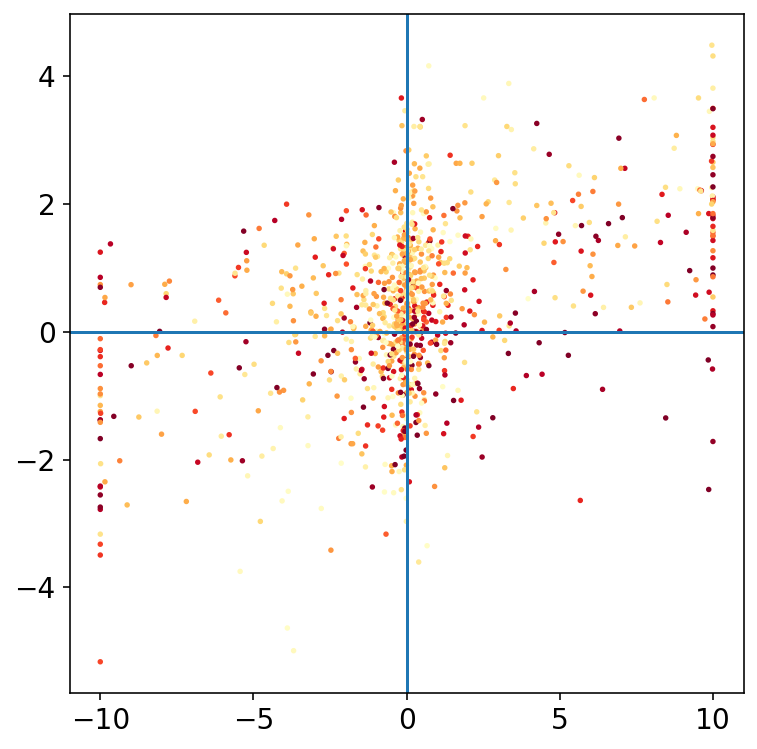

In [53]:
fig,plots=plt.subplots(1)
fig.set_size_inches(6,6)

x='p'
plots.scatter(evip_res.loc[comparison_genes,x],
           rna_res.loc[comparison_genes,x],s=3,
           c=cells_detected,cmap='YlOrRd')
plt.grid(False)

plt.axvline(x=0)
plt.axhline(y=0)

from scipy.stats import spearmanr,pearsonr
s,ps=spearmanr(evip_res.loc[comparison_genes,x],rna_res.loc[comparison_genes,x])
p,pp=pearsonr(evip_res.loc[comparison_genes,x],rna_res.loc[comparison_genes,x])



In [47]:
#get genes to programs mapping
PROTEIN='KRAS'
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14'
SUBSAMPLED=DATA+'/'+PROTEIN+'/subsampled/A549.'+PROTEIN

counts=20000

FIGS=DATA+'/2021-03-22_Figures/'
os.system('mkdir -p '+FIGS)
print(FIGS)

sc.settings.figdir=FIGS

adata_pro=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.regress_out_vbc.analysis.1000cells.new_format.2021-03-23.h5ad',cache=False)
adata_pro

/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2021-03-22_Figures/
Only considering the two last: ['.2021-03-23', '.h5ad'].
Only considering the two last: ['.2021-03-23', '.h5ad'].


AnnData object with n_obs × n_vars = 89262 × 1145 
    obs: 'batch', 'known', 'n_counts', 'n_genes', 'percent_mito', 'n_counts_downsampled', 'n_counts_original', 'vbc.counts', 'batch_num4', 'batch_num7', 'batch_num11', 'batch_num8', 'batch_num13', 'batch_num23', 'batch_num9', 'batch_num2', 'batch_num24', 'batch_num10', 'batch_num12', 'batch_num16', 'batch_num20', 'batch_num18', 'batch_num25', 'batch_num31', 'batch_num28', 'batch_num5', 'batch_num14', 'batch_num15', 'batch_num29', 'batch_num3', 'batch_num6', 'batch_num22', 'batch_num26', 'batch_num17', 'batch_num27', 'batch_num1', 'batch_num19', 'batch_num21', 'batch_num0', 'batch_num30', 'louvain', 'guide', 'A146P', 'K117R', 'Y166H', 'K169K', 'K178K', 'T50P', 'A146V', 'L52F', 'K176Q', 'A155G', 'G60D', 'T158T', 'K88K', 'D119G', 'L159S', 'G13V', 'Q61P', 'D33E', 'S136N', 'K179R', 'T74T', 'G60S', 'Q99E', 'G13R', 'G12D', 'R164Q', 'I36M', 'C185Y', 'I163S', 'P34R', 'G60V', 'G12A', 'K117N', 'T158A', 'G12I', 'T74A', 'K5E', 'P34L', 'A59E', 'A146

In [61]:
pros=list(set(adata_pro.var['bulk.variant.program']))
print(pros)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


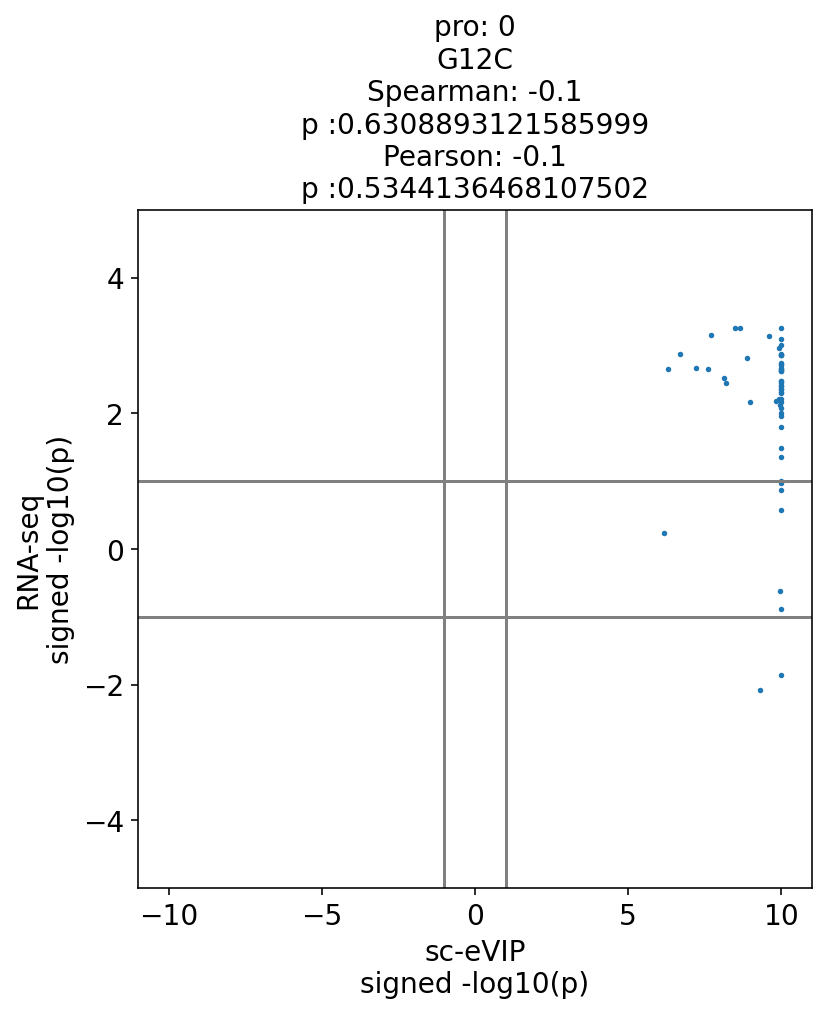

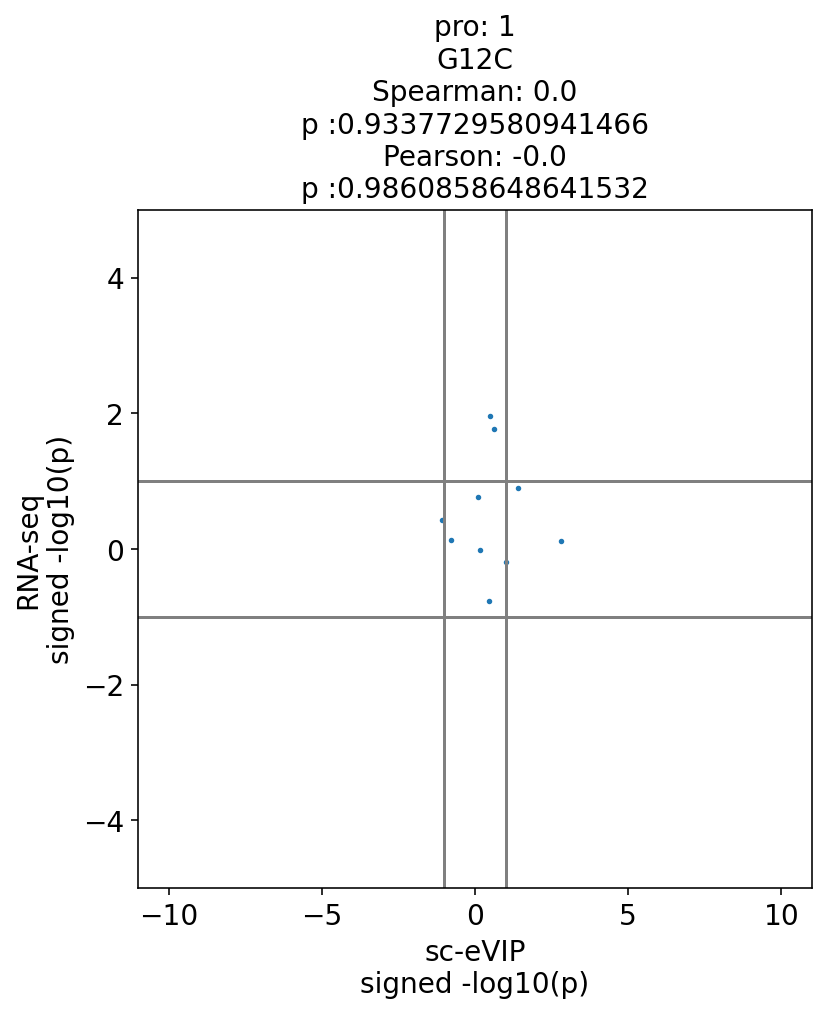

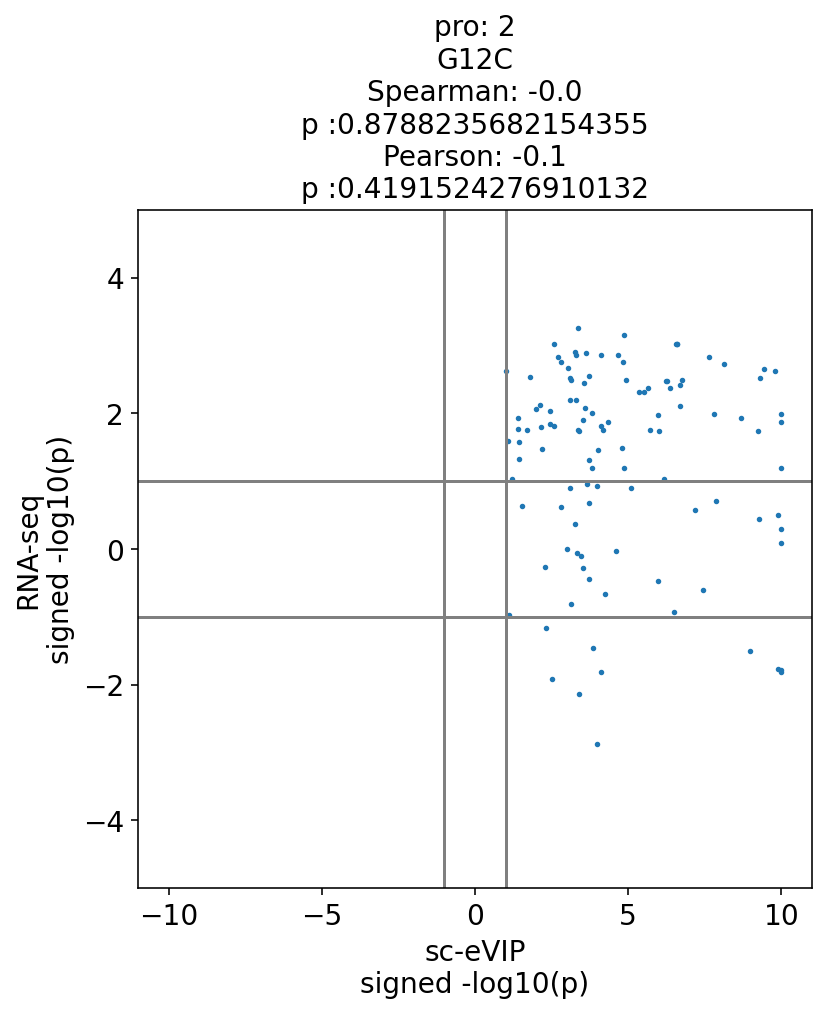

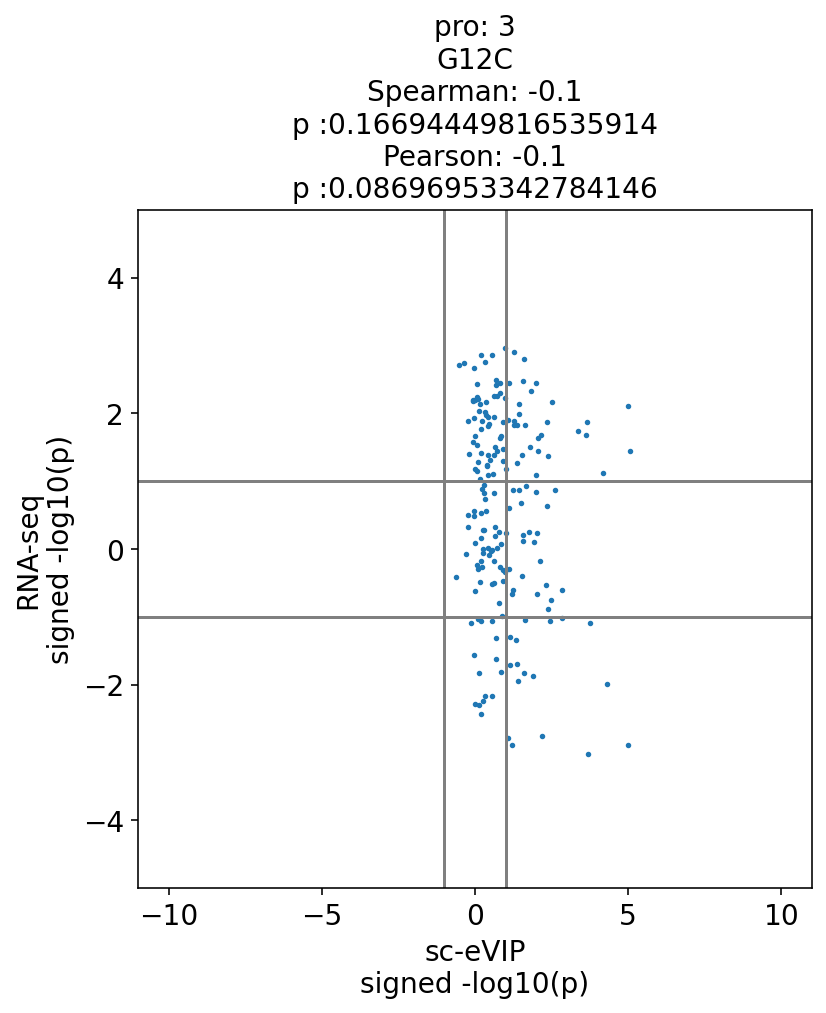

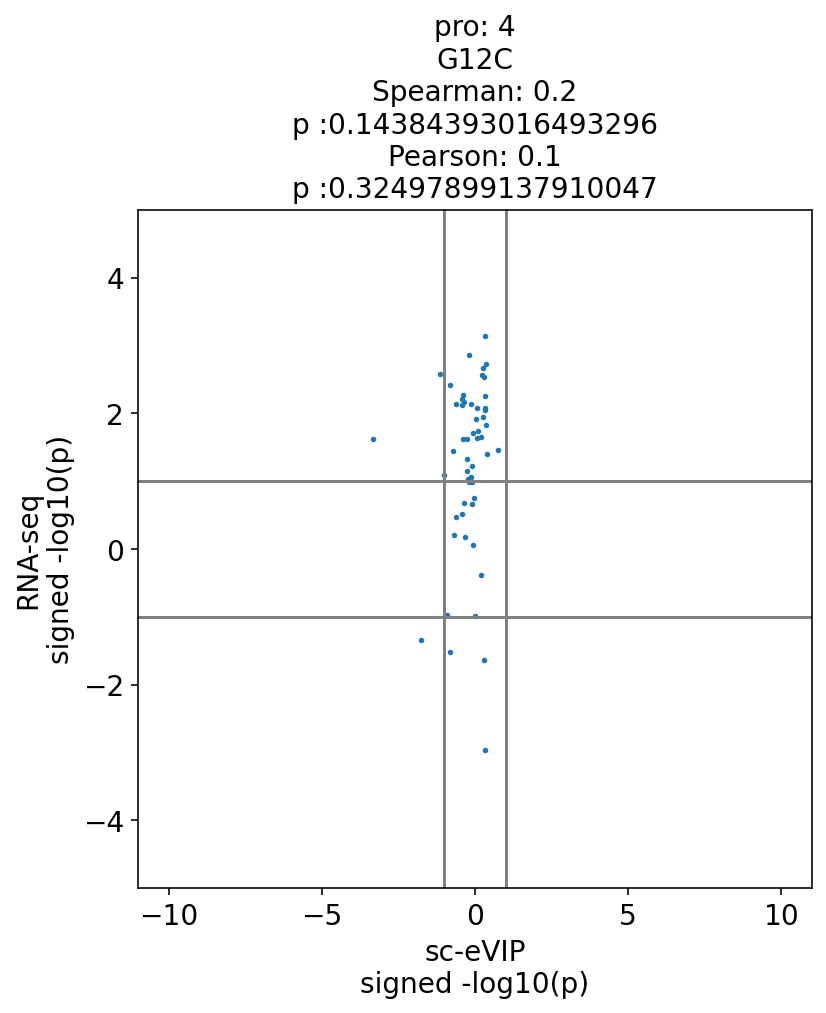

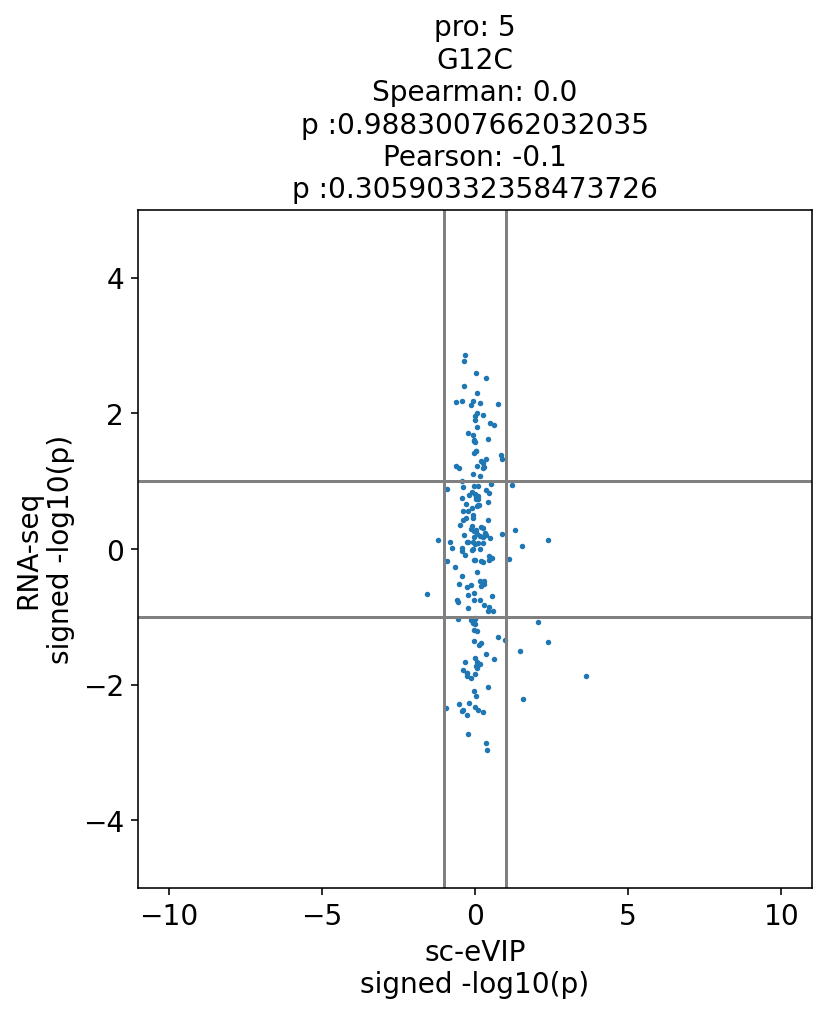

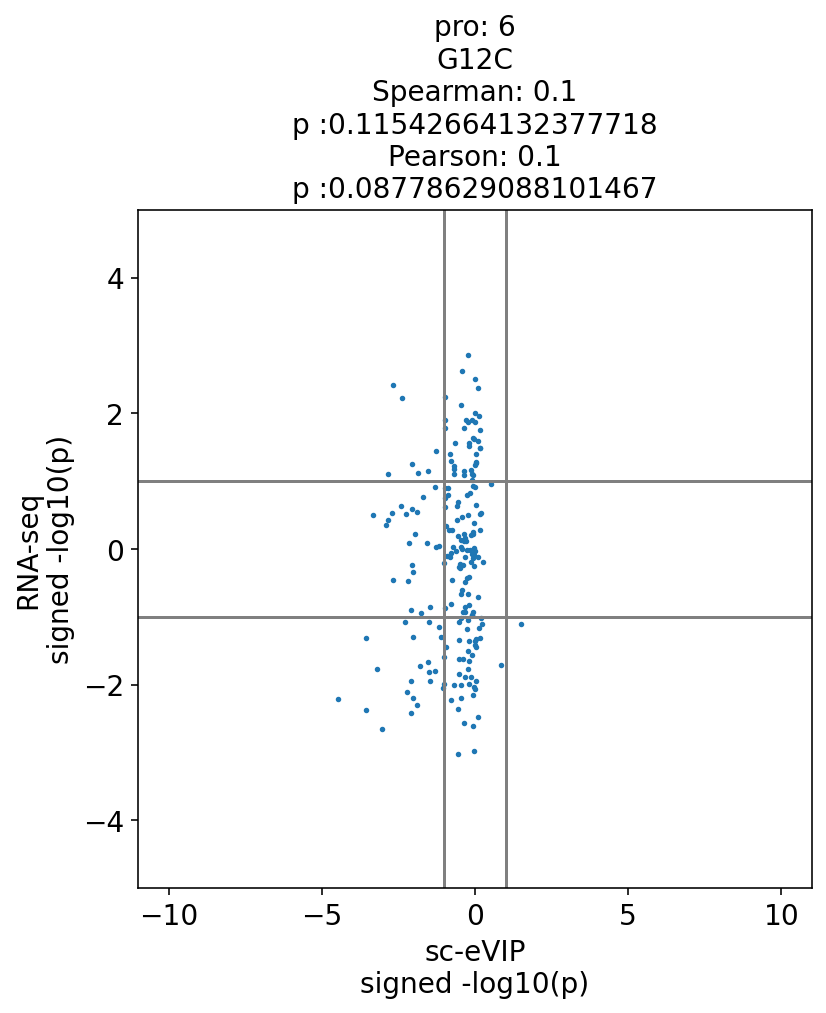

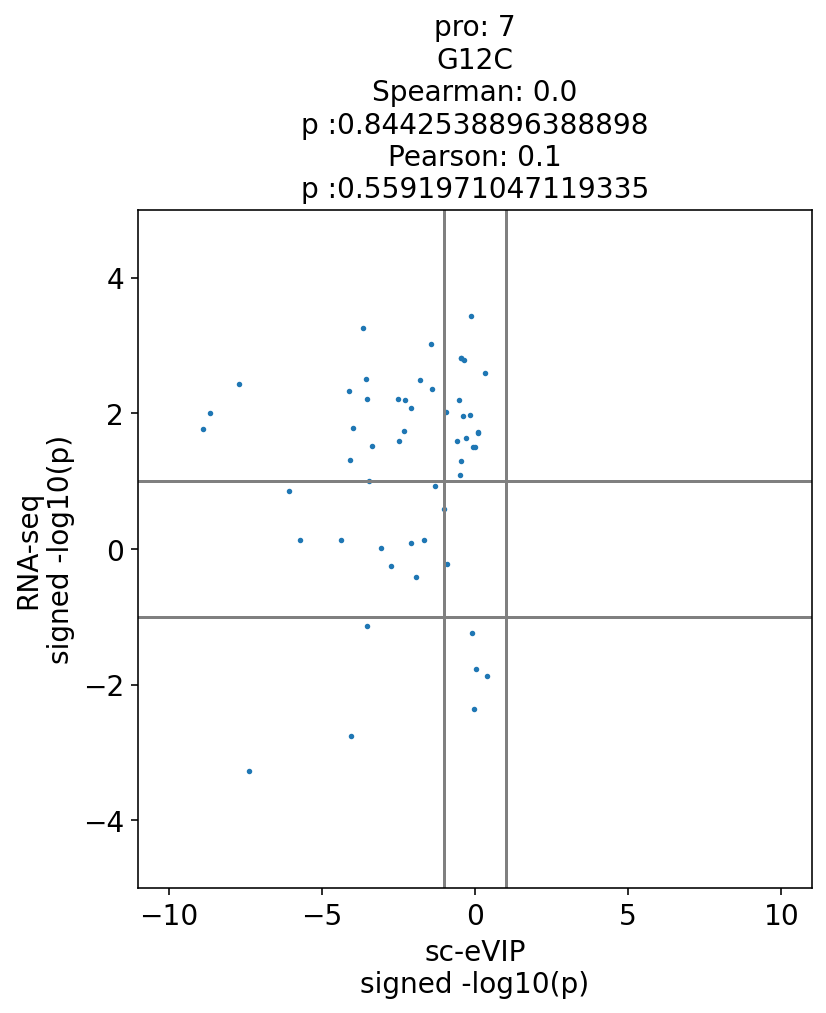

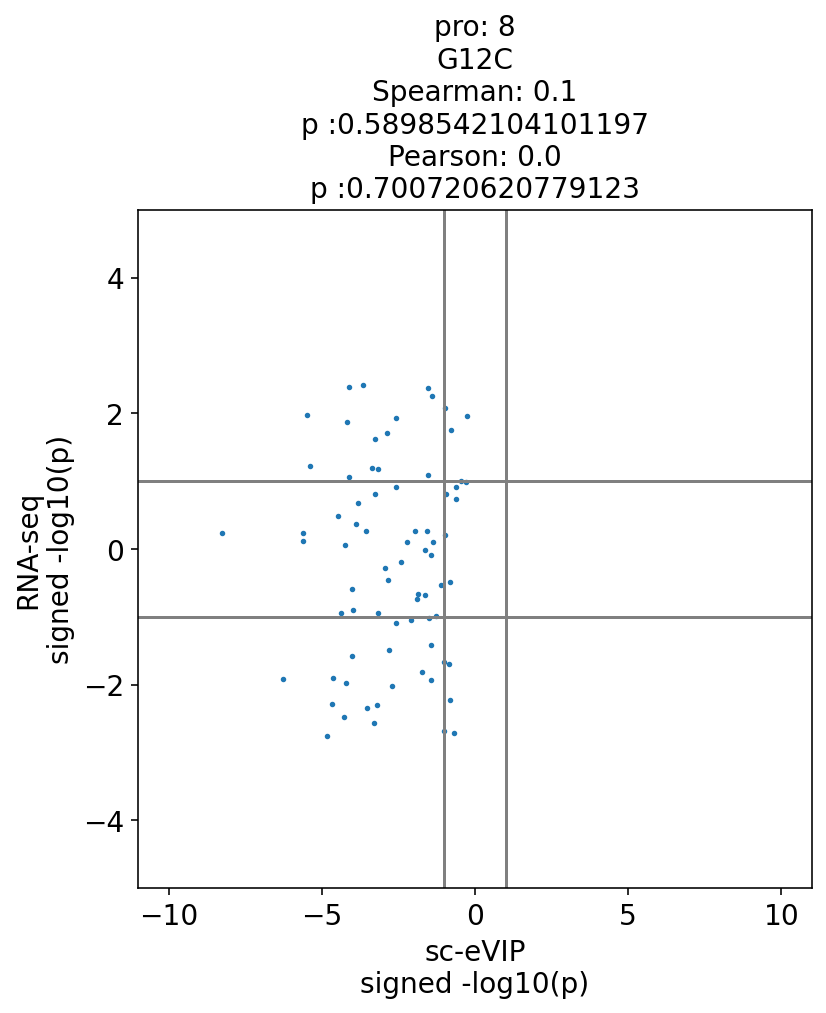

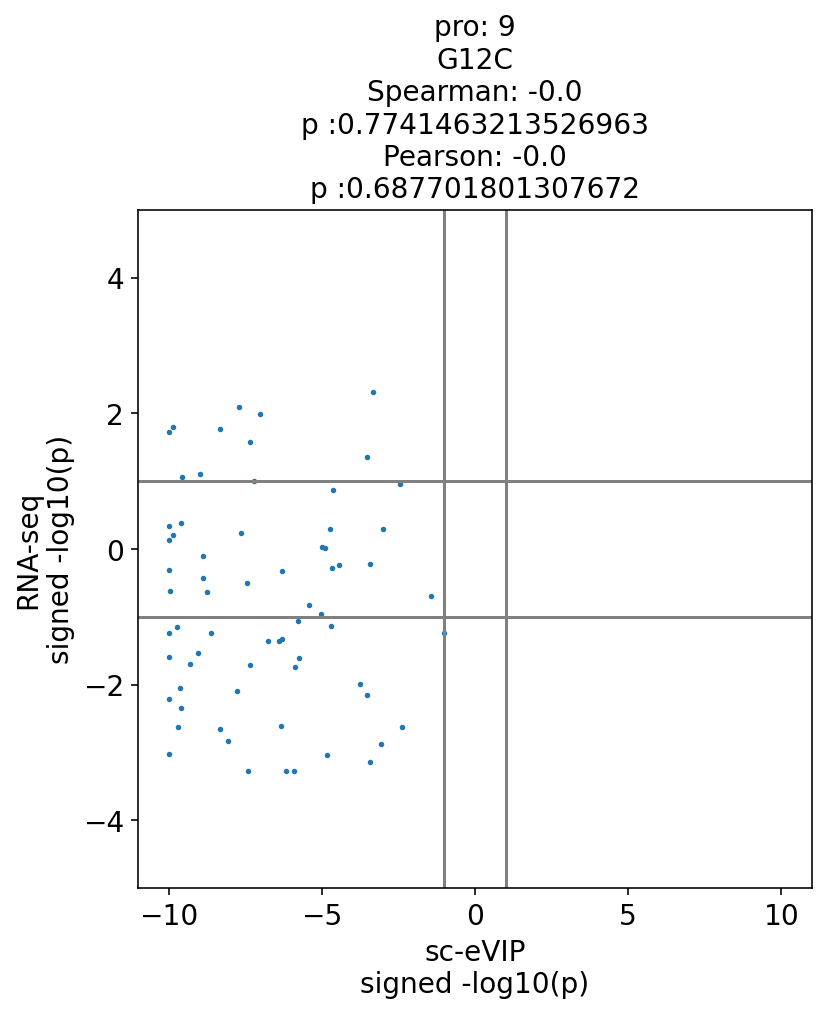

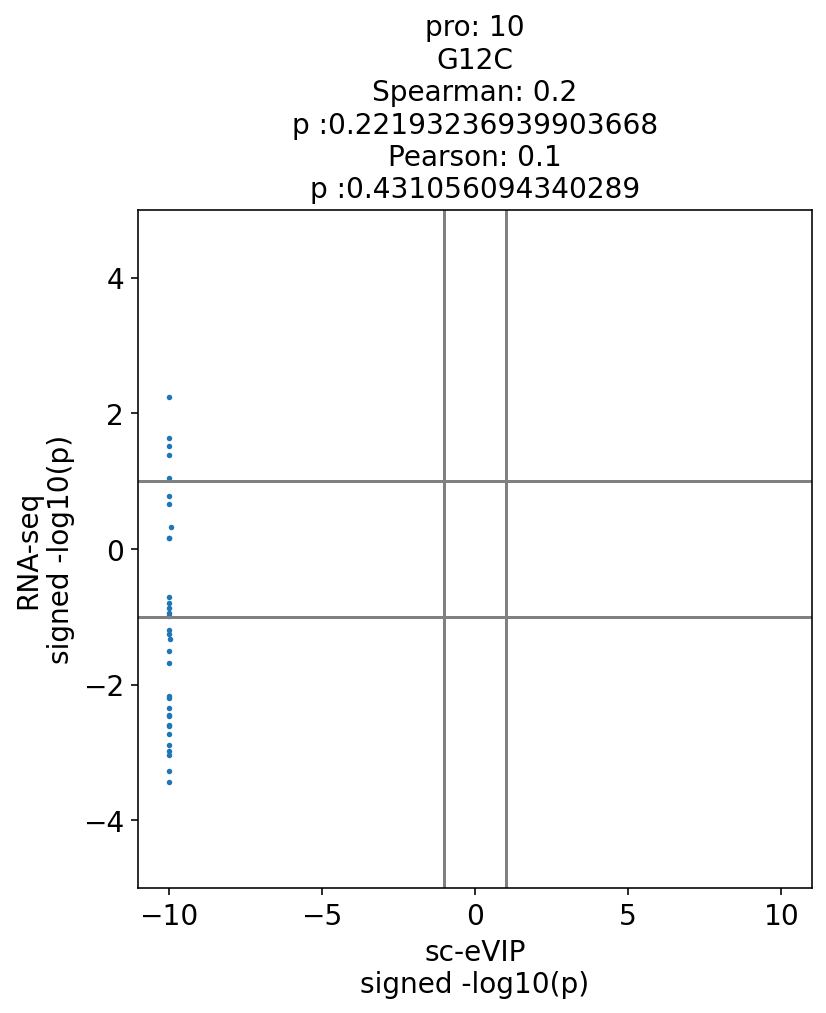

In [66]:
for pro in pros:
    genes=adata_pro.var_names[adata_pro.var['bulk.variant.program']==pro]
    #now, make a plot for just these genes
    genes2=list(set(genes).intersection(set(comparison_genes)))
    
    fig,plots=plt.subplots(1)
    fig.set_size_inches(6,6)

    plots.scatter(evip_res.loc[genes2,'p'],
               rna_res.loc[genes2,'p'],s=3)
    plt.grid(False)

    plt.axvline(x=-1,color='gray')
    plt.axhline(y=-1,color='gray')
    plt.axvline(x=1,color='gray')
    plt.axhline(y=1,color='gray')

    from scipy.stats import spearmanr,pearsonr
    s,ps=spearmanr(evip_res.loc[genes2,'p'],rna_res.loc[genes2,'p'])
    p,pp=pearsonr(evip_res.loc[genes2,'p'],rna_res.loc[genes2,'p'])

    plots.set_xlim(-11,11)
    plots.set_ylim(-5,5)
    plots.set_xlabel('sc-eVIP\nsigned -log10(p)')
    plots.set_ylabel('RNA-seq\nsigned -log10(p)')
    plots.set_title('pro: '+str(pro)+'\n'+v+'\nSpearman: '+str(np.round(s,1))+'\np :'+str(ps)+'\nPearson: '+str(np.round(p,1))+'\np :'+str(pp))
    plt.show()

In [74]:
data=pd.DataFrame({'signed_p':list(rna_res.loc[comparison_genes,'p'])},index=comparison_genes)
data['program']=adata_pro.var['bulk.variant.program'].loc[comparison_genes]
data['program_color']=adata_pro.var['bulk.variant.program_color'].loc[comparison_genes]
data['signed_p']=data['signed_p'].astype(float)

In [82]:
pal={}
for c in set(data['program_color']):
    pal[c]=c

In [75]:
data.shape

(1037, 3)

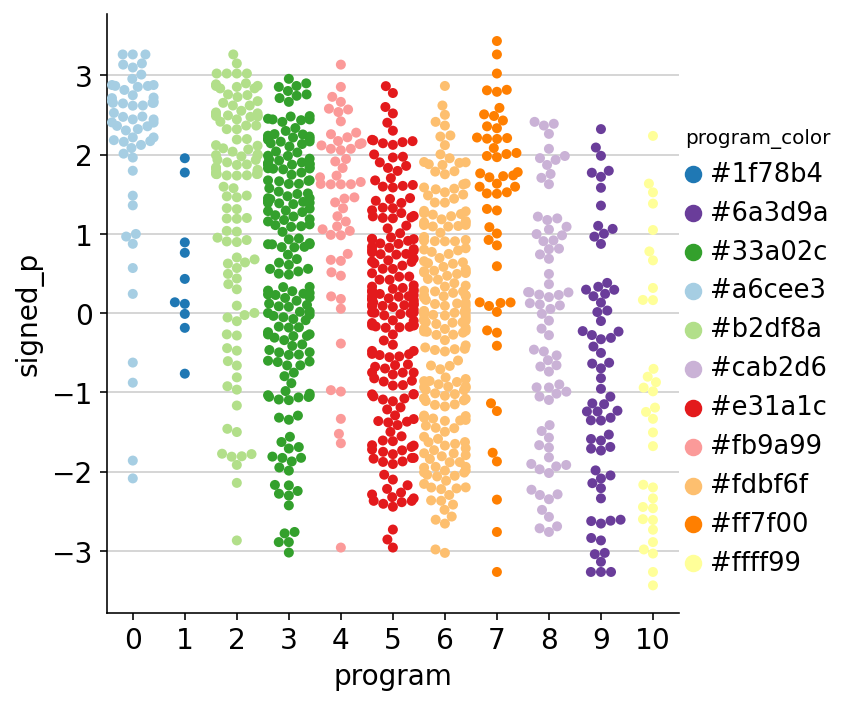

In [84]:
sns.catplot(data=data,y='signed_p',x='program',hue='program_color',
            palette=pal,kind='swarm',
           )

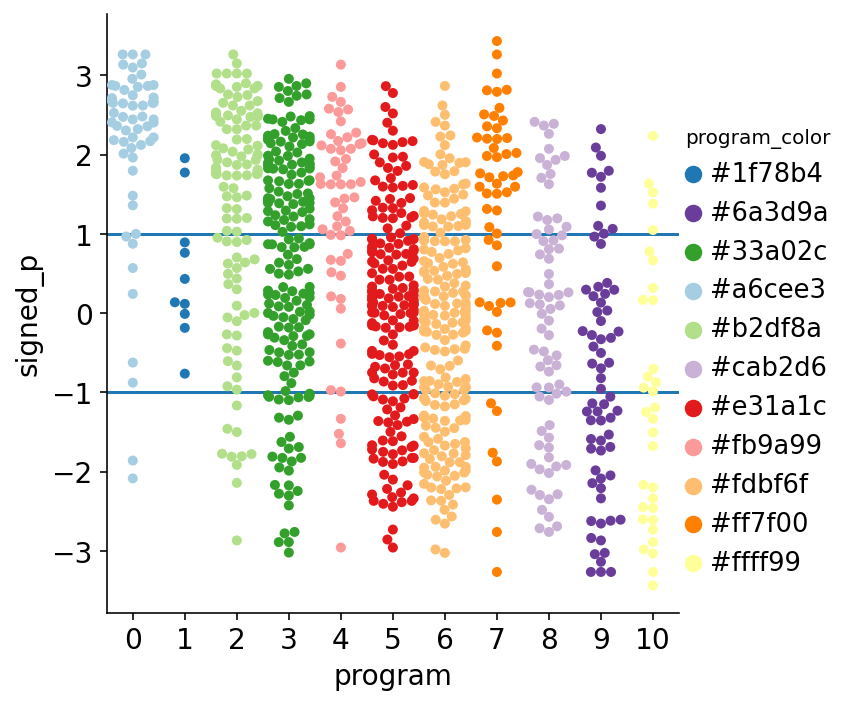

In [92]:
sns.catplot(data=data,y='signed_p',x='program',hue='program_color',
            palette=pal,
            kind='swarm',
           )
plt.axhline(y=-1)
plt.axhline(y=1)
plt.grid(False)

In [93]:
v='G12C'
test='t-test'

data1=pd.DataFrame(rnadata[rnadata.obs['variant']==v,:].X,
                      columns=rnadata.var_names)
data2=pd.DataFrame(rnadata[rnadata.obs['variant']=='WT',:].X,
                  columns=rnadata.var_names)
shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
data1=data1.loc[:,shared_genes]
data2=data2.loc[:,shared_genes]
rna_res=test_across_genes(data1,data2,test=test)

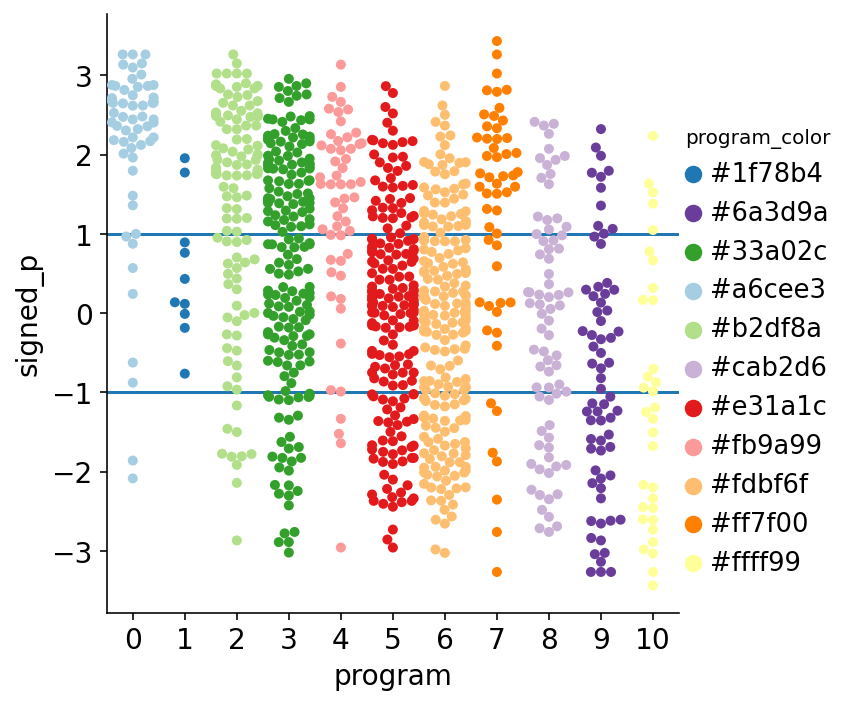

In [94]:
data=pd.DataFrame({'signed_p':list(rna_res.loc[comparison_genes,'p'])},index=comparison_genes)
data['program']=adata_pro.var['bulk.variant.program'].loc[comparison_genes]
data['program_color']=adata_pro.var['bulk.variant.program_color'].loc[comparison_genes]
data['signed_p']=data['signed_p'].astype(float)
pal={}
for c in set(data['program_color']):
    pal[c]=c
    
sns.catplot(data=data,y='signed_p',x='program',hue='program_color',
            palette=pal,
            kind='swarm',
           )
plt.axhline(y=-1)
plt.axhline(y=1)
plt.grid(False)

In [95]:
v='G12V'
test='t-test'

data1=pd.DataFrame(rnadata[rnadata.obs['variant']==v,:].X,
                      columns=rnadata.var_names)
data2=pd.DataFrame(rnadata[rnadata.obs['variant']=='WT',:].X,
                  columns=rnadata.var_names)
shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
data1=data1.loc[:,shared_genes]
data2=data2.loc[:,shared_genes]
rna_res=test_across_genes(data1,data2,test=test)

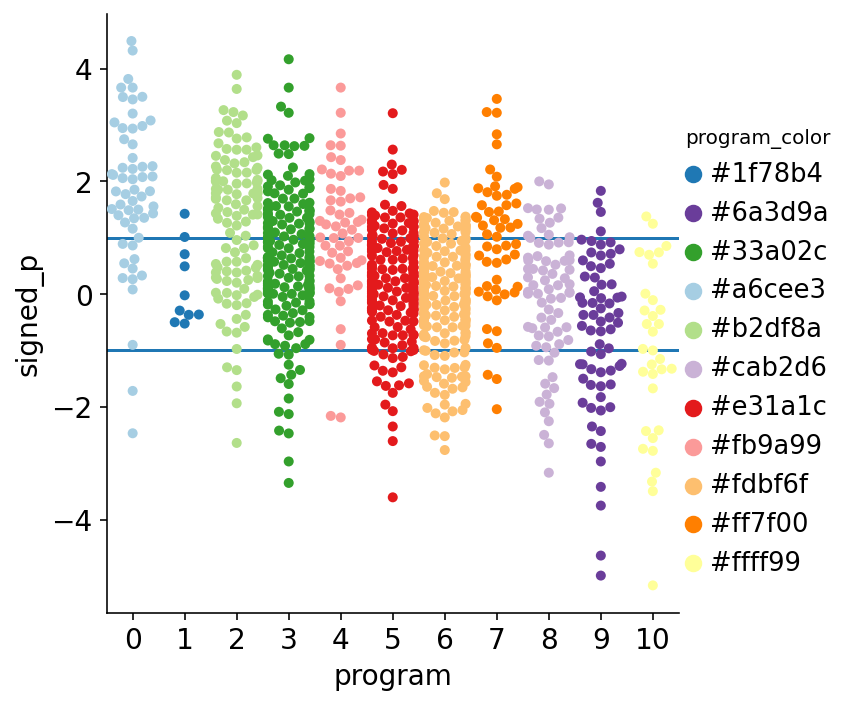

In [96]:
data=pd.DataFrame({'signed_p':list(rna_res.loc[comparison_genes,'p'])},index=comparison_genes)
data['program']=adata_pro.var['bulk.variant.program'].loc[comparison_genes]
data['program_color']=adata_pro.var['bulk.variant.program_color'].loc[comparison_genes]
data['signed_p']=data['signed_p'].astype(float)
pal={}
for c in set(data['program_color']):
    pal[c]=c
    
sns.catplot(data=data,y='signed_p',x='program',hue='program_color',
            palette=pal,
            kind='swarm',
           )
plt.axhline(y=-1)
plt.axhline(y=1)
plt.grid(False)

Text(0.5, 1.0, 'G12V\nSpearman: 0.1\np :1.1171497693244187e-56\nPearson: 0.2\np :8.99346762734743e-151')

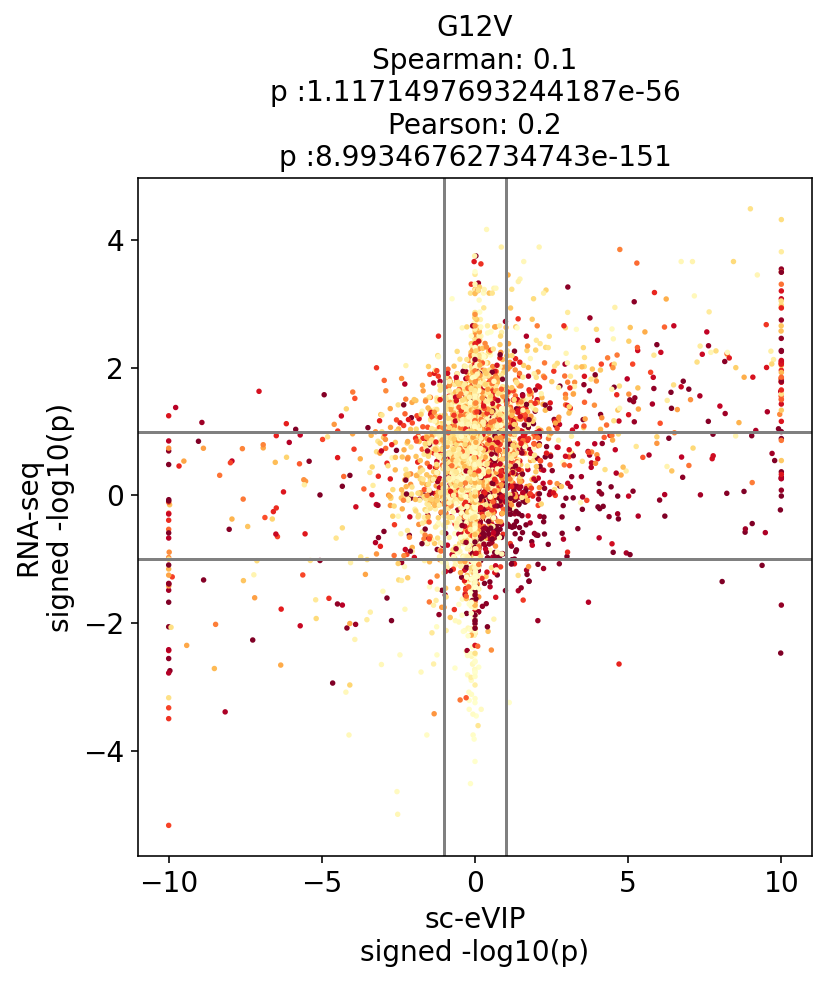

In [58]:
fig,plots=plt.subplots(1)
fig.set_size_inches(6,6)

plots.scatter(evip_res.loc[comparison_genes,'p'],
           rna_res.loc[comparison_genes,'p'],s=3,
           c=cells_detected,cmap='YlOrRd')
plt.grid(False)

plt.axvline(x=-1,color='gray')
plt.axhline(y=-1,color='gray')
plt.axvline(x=1,color='gray')
plt.axhline(y=1,color='gray')

from scipy.stats import spearmanr,pearsonr
s,ps=spearmanr(evip_res.loc[comparison_genes,'p'],rna_res.loc[comparison_genes,'p'])
p,pp=pearsonr(evip_res.loc[comparison_genes,'p'],rna_res.loc[comparison_genes,'p'])

plots.set_xlabel('sc-eVIP\nsigned -log10(p)')
plots.set_ylabel('RNA-seq\nsigned -log10(p)')
plots.set_title(v+'\nSpearman: '+str(np.round(s,1))+'\np :'+str(ps)+'\nPearson: '+str(np.round(p,1))+'\np :'+str(pp))


In [59]:
v='G12V'
test='t-test'

data1=pd.DataFrame(rnadata[rnadata.obs['variant']==v,:].X,
                      columns=rnadata.var_names)
data2=pd.DataFrame(rnadata[rnadata.obs['variant']=='WT',:].X,
                  columns=rnadata.var_names)
shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
data1=data1.loc[:,shared_genes]
data2=data2.loc[:,shared_genes]
rna_res=test_across_genes(data1,data2,test=test)

In [60]:
v='G12C'
test='t-test'

data1=pd.DataFrame(rnadata[rnadata.obs['variant']==v,:].X,
                      columns=rnadata.var_names)
data2=pd.DataFrame(rnadata[rnadata.obs['variant']=='WT',:].X,
                  columns=rnadata.var_names)
shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
data1=data1.loc[:,shared_genes]
data2=data2.loc[:,shared_genes]
evip_res=test_across_genes(data1,data2,test=test)

In [ ]:
comparison_genes=list(set(rna_res.index).intersection(set(evip_res.index)))
print(len(comparison_genes))
cells_detected=np.sum(adata.raw[:,comparison_genes].X.toarray()>0.0,axis=0)
print(cells_detected.shape)

Text(0.5, 1.0, 'G12C vs G12V\nSpearman: 0.8\np :0.0\nPearson: 0.8\np :0.0')

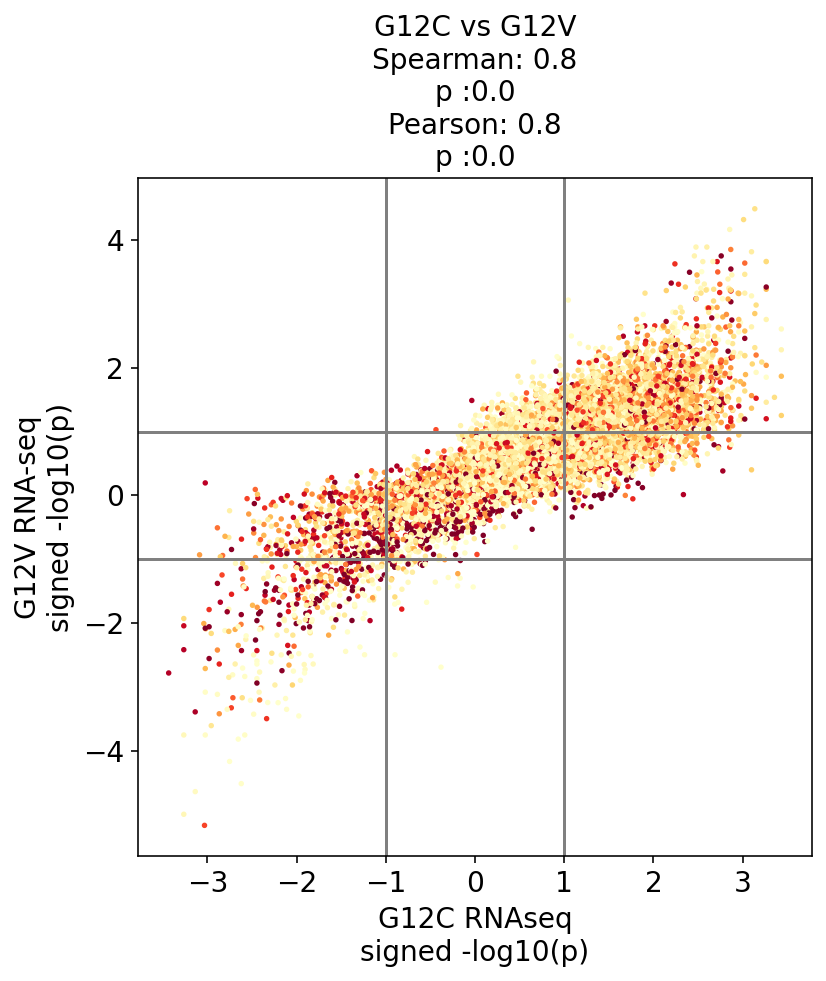

In [62]:
fig,plots=plt.subplots(1)
fig.set_size_inches(6,6)

plots.scatter(evip_res.loc[comparison_genes,'p'],
           rna_res.loc[comparison_genes,'p'],s=3,
           c=cells_detected,cmap='YlOrRd')
plt.grid(False)

plt.axvline(x=-1,color='gray')
plt.axhline(y=-1,color='gray')
plt.axvline(x=1,color='gray')
plt.axhline(y=1,color='gray')

from scipy.stats import spearmanr,pearsonr
s,ps=spearmanr(evip_res.loc[comparison_genes,'p'],rna_res.loc[comparison_genes,'p'])
p,pp=pearsonr(evip_res.loc[comparison_genes,'p'],rna_res.loc[comparison_genes,'p'])

plots.set_xlabel('G12C RNAseq\nsigned -log10(p)')
plots.set_ylabel('G12V RNA-seq\nsigned -log10(p)')
plots.set_title('G12C vs G12V\nSpearman: '+str(np.round(s,1))+'\np :'+str(ps)+'\nPearson: '+str(np.round(p,1))+'\np :'+str(pp))


In [ ]:


def compare_variant(v,rnadata,adata,test='t-test'):
    
    #rnaseq
    data1=pd.DataFrame(rnadata[rnadata.obs['variant']==v,:].X,
                      columns=rnadata.var_names)
    data2=pd.DataFrame(rnadata[rnadata.obs['variant']=='WT',:].X,
                      columns=rnadata.var_names)
    shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
    data1=data1.loc[:,shared_genes]
    data2=data2.loc[:,shared_genes]
    rna_res=test_across_genes(data1,data2,test=test)
    
    data1=pd.DataFrame(adata[adata.obs['variant']==v,:].X.toarray(),
                  columns=adata.var_names)
    data2=pd.DataFrame(adata[adata.obs['variant']=='WT',:].X.toarray(),
                      columns=adata.var_names)
    shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
    data1=data1.loc[:,shared_genes]
    data2=data2.loc[:,shared_genes]
    evip_res=test_across_genes(data1,data2,test=test)
    
    #shared genes
    comparison_genes=list(set(list(evip_res.index)).intersection(set(list(rna_res.index))))
    print(len(comparison_genes))

    fig,plots=plt.subplots(1,2)
    fig.set_size_inches(8,4)

    rna_df=pd.DataFrame({'signed_p':rna_res.loc[comparison_genes,'p']},
                       index=comparison_genes)
    evip_df=pd.DataFrame({'signed_p':evip_res.loc[comparison_genes,'p']},
                       index=comparison_genes)

    plots[0].scatter(evip_df['signed_p'],rna_df.loc[evip_df.index,'signed_p'],
                 s=3,#color='black',
                     alpha=0.5,
                     c=adata[:,comparison_genes].X.toarray().mean(axis=0),
                    cmap='YlOrRd',
                     vmin=0,vmax=2,
                    )
    from scipy.stats import spearmanr,pearsonr
    s,ps=spearmanr(evip_df['signed_p'],rna_df.loc[evip_df.index,'signed_p'])
    p,pp=pearsonr(evip_df['signed_p'],rna_df.loc[evip_df.index,'signed_p'])
    plots[0].axvline(x=2,linestyle='--',color='gray')
    plots[0].axvline(x=-2,linestyle='--',color='gray')
    plots[0].axhline(y=2,linestyle='--',color='gray')
    plots[0].axhline(y=-2,linestyle='--',color='gray')

    plots[0].set_xlabel('sc-eVIP')
    plots[0].set_ylabel('RNA-seq')
    plots[0].grid(False)
    plots[0].set_title(v+'\n'+'signed p-value'+'\nSpearman: '+str(np.round(s,1))+'\np :'+str(ps)+'\nPearson: '+str(np.round(p,1))+'\np :'+str(pp))

    rna_df=pd.DataFrame({'difference':rna_res.loc[comparison_genes,'difference']},
                       index=comparison_genes)
    evip_df=pd.DataFrame({'difference':evip_res.loc[comparison_genes,'difference']},
                       index=comparison_genes)


    plots[1].scatter(evip_df['difference'],rna_df.loc[evip_df.index,'difference'],
                 s=3,#color='black',
                     alpha=0.5,
                     c=adata[:,comparison_genes].X.toarray().mean(axis=0),
                    cmap='YlOrRd',
                     vmin=0,vmax=2,
                    )
    plots[1].axvline(x=0,linestyle='--',color='gray')
    plots[1].axhline(y=0,linestyle='--',color='gray')
    plots[1].set_xlim(-0.25,0.25)

    plots[1].set_xlabel('sc-eVIP')
    plots[1].set_ylabel('RNA-seq')
    plots[1].grid(False)
    plots[1].set_title(v+'\n'+'difference')
    fig.subplots_adjust(wspace=0.5)
    plt.show()
    
compare_variant('G12C',rnadata[:,shared_genes],adata[:,shared_genes])

In [ ]:
def bulk(adata_here,grouping_variable,by_batch=False,return_matrix=False,use_raw=False):

    """Compute an in silico bulk set of expression profiles, based on cell labels                                                       
                                                                                                                                        
    Parameters                                                                                                                          
    ----------                                                                                                                          
    adata_here : `scanpy Anndata`                                                                                                       
    grouping_variable : `str`                                                                                                           
        The name of the variable that specifies a label for each cell. This variable must be accessible as `adata_here.obs[grouping_var\
iable]`                                                                                                                                 
    by_batch : `bool`                                                                                                                   
        Whether to combine data from cells with the same label but from different batches.                                              
        If this is set to True, adata_here must have a adata_here.obs["batch"]                                                          
                                                                                                                                        
    Returns                                                                                                                             
    -------                                                                                                                             
    profile_matrix_df : a pandas DataFrame of size (number of conditions) x (number of genes).                                          
                        The number of conditions is: number of unique labels in `adata_here.obs[grouping_variable]` if by_batch==False  
                                                     number of unique labels times the number of batches if by batch==True              
    """

    #construct the profiles                                                                                                             
    profiles=list(set(adata_here.obs[grouping_variable]))
    adata_here.obs['profile']=adata_here.obs[grouping_variable]

    if by_batch:
        profile_list=[]
        #make a new variable that combines batch and variable into 1                                                                    
        for cell_idx in range(len(adata_here.obs_names)):
            profile=adata_here.obs['batch'][cell_idx]+'_'+adata_here.obs[grouping_variable][cell_idx]
            #if profile not in profile_list:
            profile_list.append(profile)
        adata_here.obs['profile']=profile_list
        profiles=list(set(profile_list))

    if not use_raw:
        genes=adata_here.var_names
    else:
        genes=adata_here.raw.var_names
    profile_matrix=np.zeros((len(profiles),len(genes)))
    print(len(profiles))
    for profile_idx in range(len(profiles)):
        if profile_idx%1000==0:
            print(profile_idx)
        profile=profiles[profile_idx]
        cells_with_profile=list(adata_here.obs_names[adata_here.obs['profile']==profile])
        if not use_raw:
            data_profile=adata_here[cells_with_profile,:].X.toarray()
        else:
            data_profile=adata_here.raw[cells_with_profile,:].X
        profile_matrix[profile_idx,:]=data_profile.mean(axis=0)
    profile_matrix_df=pd.DataFrame(profile_matrix)
    profile_matrix_df.index=profiles
    profile_matrix_df.columns=genes
    adata_here.uns['bulk.'+grouping_variable]=profile_matrix_df
    if return_matrix:
        return(profile_matrix_df)


sc_bulk_counts=bulk(adata_counts[adata_counts.obs['variant'].isin(['WT','G12C','G12V']),:],
                                 'variant',use_raw=False,by_batch=True,return_matrix=True)

In [ ]:
variants=[]
for i in range(sc_bulk_counts.shape[0]):
    variants.append(list(sc_bulk_counts.index)[i].split('_')[1])
print(variants)

In [ ]:
scevip=sc.AnnData(sc_bulk_counts)#adata.uns['bulk.variant'])
scevip.obs['variant']=variants#list(adata.uns['bulk.variant'].index)
#scevip.X=scevip.X-scevip[scevip.obs['variant']=='WT',:].X.mean(axis=0)

sc.pp.scale(scevip)
scevip

In [ ]:
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2021-02-01'

rnaseq=pd.read_csv(DATA+'/data/rnaseq/RNAseq.2021-02-09.transcript_quants_log2TPM_KRAS-TP53.csv',
                  index_col=0)
rnaseq.head()

In [ ]:
np.sum(rnaseq==np.inf)

In [ ]:
np.sum(rnaseq==-np.inf)

In [ ]:
#log1p
rnaseq[rnaseq!=np.inf]=np.log1p(np.power(2,rnaseq[rnaseq!=np.inf]))
rnaseq[rnaseq==np.inf]=0

In [ ]:
c=0
for col in rnaseq.columns:
    if 'G12V' in col:
        c+=1
print('G12V',c)

c=0
for col in rnaseq.columns:
    if 'G12C' in col:
        c+=1
print('G12C',c)

c=0
for col in rnaseq.columns:
    if 'WT' in col:
        c+=1
print('WT',c)

In [ ]:
#col='KRAS_p.G12C_J17_C4_S5'
col='KRAS_WT_A21_E1'
a=plt.hist(rnaseq[col],100)
plt.xlabel('log1p')

In [ ]:
rnadata=sc.AnnData(rnaseq).T
print(rnadata)

#annotate conditions
import re
conditions=[]
for i in range(rnadata.n_obs):
    obs=rnadata.obs_names[i]
    if 'KRAS' not in obs:
        condition='other'
    else:
        condition=re.sub('p.','',obs.split('_')[1])
    conditions.append(condition)
rnadata.obs['variant']=list(conditions)
rnadata.obs['rep']=rnadata.obs_names
#rnadata.X=rnadata.X-rnadata[rnadata.obs['variant']=='WT',:].X.mean(axis=0)

#zscore rnadata
#rnadata=rnadata[rnadata.obs['variant']!='other',:]
sc.pp.scale(rnadata)

print(rnadata)

In [ ]:
rnadata.obs

In [ ]:
shared_genes=list(set(adata.var_names).intersection(set(rnadata.var_names)))
print(len(shared_genes))

In [ ]:

def compare_vectors(xvals,yvals,xname='x',yname='y',plot=True):
    
    from scipy.stats import spearmanr,pearsonr
    from scipy.spatial import distance
    s,ps=spearmanr(xvals,yvals)
    p,pp=pearsonr(xvals,yvals)
    di=distance.cityblock(xvals,yvals)
    
    if plot:
        plt.scatter(xvals,
                    yvals,
                    alpha=0.1,s=1,color='black')
        plt.grid(False)
        plt.xlabel(xname)
        plt.ylabel(yname)
        plt.title('\nSpearman: '+str(np.round(s,3))+'\nPearson: '+str(np.round(p,3)))
        plt.show()
    
    return(s,p,di)

vs=['WT','G12C','G12V']
d1=scevip[:,shared_genes]
d2=rnadata[:,shared_genes]

cols1=[c for c in d1.obs_names if str(d1.obs['variant'].loc[c]) in vs]
cols2=[c for c in d2.obs_names if str(d2.obs['variant'].loc[c]) in vs]

rep_df=pd.DataFrame(index=cols1,columns=cols2)

for r1 in cols1:
    for r2 in cols2:
        a=d1[r1,].X.flatten()
        b=d2[r2,].X.flatten()
        sp,p,di=compare_vectors(a,b,plot=False,xname=r1,yname=r2)
        rep_df.loc[r1,r2]=sp
        
rep_df=rep_df.astype(float)

In [ ]:
x=1
g=sns.clustermap(rep_df,#.loc[['G12C','G12V'],:],#annot=True,
               cmap='bwr',vmin=-x,vmax=x,
                 cbar_pos=(0.02,0.01,0.1,0.05),
                 #cbar_kws={'orientation':'horizontal',
                 #         'label':'Spearman\ncorrelation',
                 #          'ticks':[-1,1]},
                 figsize=(10,30),yticklabels=True,xticklabels=True,
              #figsize=(8,5)
                )
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.savefig(FIGS+'/RNAseq.heatmap.sp.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/RNAseq.heatmap.sp.png',bbox_inches = "tight")

T-tests between variant and WT
==

In [ ]:
#go gene by gene and get the DE genes

from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

def test_across_genes(data1_df,data2_df,test='t-test',ps=1e-10,eps=1e-6):

    data1=np.array(data1_df)
    data2=np.array(data2_df)
    
    #check same numbers of genes for the 2 groups
    assert data1.shape[1]==data2.shape[1]
    num_genes=data1.shape[1]

    #get means, differences and log2 ratios
    X1_means=np.mean(data1,axis=0)
    X2_means=np.mean(data2,axis=0)
    differences=X1_means-X2_means
    ##log2_ratios=np.log2(X1_means+pseudocount)-np.log2(X2_means+pseudocount)

    pvals=[]
    for gene_idx in range(num_genes):
        
        #if gene_idx%1000==0:
        #    perturbseq.utils.display_progress(gene_idx,num_genes)

        X_1=data1[:,gene_idx]
        X_2=data2[:,gene_idx]
        
        if (X_1.sum()==0.0 and X_2.sum()==0.0) or (X_1.std()<eps and X_2.std()<eps):
            pvals.append(1.0) #everything is 0, give the worst p-value
            continue
        #print(gene_idx)
        if test=='Mann-Whitney':
            u,p=mannwhitneyu(X_1,X_2,alternative='two-sided')
        if test=='t-test':
            t,p=ttest_ind(X_1,X_2)
        #print(gene_idx,p,X_1.sum(),X_2.sum(),X_2)
            
        pvals.append(p)
        
    from statsmodels.stats.multitest import multipletests
    pvals=multipletests(pvals, alpha=0.05, method='fdr_bh')
        
    #put together result
    results=pd.DataFrame({'condition1_mean':X1_means,
                          'condition2_mean':X2_means,
                          'difference':differences,
                          ##'log2_ratio':log2_ratios,
                          'p':np.multiply(-np.log10(np.array(pvals)+ps),np.sign(differences))},
                         index=data1_df.columns)
    return(results)

def compare_variant(v,rnadata,adata,test='t-test'):
    
    #rnaseq
    data1=pd.DataFrame(rnadata[rnadata.obs['variant']==v,:].X,
                      columns=rnadata.var_names)
    data2=pd.DataFrame(rnadata[rnadata.obs['variant']=='WT',:].X,
                      columns=rnadata.var_names)
    shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
    data1=data1.loc[:,shared_genes]
    data2=data2.loc[:,shared_genes]
    rna_res=test_across_genes(data1,data2,test=test)
    
    data1=pd.DataFrame(adata[adata.obs['variant']==v,:].X.toarray(),
                  columns=adata.var_names)
    data2=pd.DataFrame(adata[adata.obs['variant']=='WT',:].X.toarray(),
                      columns=adata.var_names)
    shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
    data1=data1.loc[:,shared_genes]
    data2=data2.loc[:,shared_genes]
    evip_res=test_across_genes(data1,data2,test=test)
    
    #shared genes
    comparison_genes=list(set(list(evip_res.index)).intersection(set(list(rna_res.index))))
    print(len(comparison_genes))

    fig,plots=plt.subplots(1,2)
    fig.set_size_inches(8,4)

    rna_df=pd.DataFrame({'signed_p':rna_res.loc[comparison_genes,'p']},
                       index=comparison_genes)
    evip_df=pd.DataFrame({'signed_p':evip_res.loc[comparison_genes,'p']},
                       index=comparison_genes)

    plots[0].scatter(evip_df['signed_p'],rna_df.loc[evip_df.index,'signed_p'],
                 s=3,#color='black',
                     alpha=0.5,
                     c=adata[:,comparison_genes].X.toarray().mean(axis=0),
                    cmap='YlOrRd',
                     vmin=0,vmax=2,
                    )
    from scipy.stats import spearmanr,pearsonr
    s,ps=spearmanr(evip_df['signed_p'],rna_df.loc[evip_df.index,'signed_p'])
    p,pp=pearsonr(evip_df['signed_p'],rna_df.loc[evip_df.index,'signed_p'])
    plots[0].axvline(x=2,linestyle='--',color='gray')
    plots[0].axvline(x=-2,linestyle='--',color='gray')
    plots[0].axhline(y=2,linestyle='--',color='gray')
    plots[0].axhline(y=-2,linestyle='--',color='gray')

    plots[0].set_xlabel('sc-eVIP')
    plots[0].set_ylabel('RNA-seq')
    plots[0].grid(False)
    plots[0].set_title(v+'\n'+'signed p-value'+'\nSpearman: '+str(np.round(s,1))+'\np :'+str(ps)+'\nPearson: '+str(np.round(p,1))+'\np :'+str(pp))

    rna_df=pd.DataFrame({'difference':rna_res.loc[comparison_genes,'difference']},
                       index=comparison_genes)
    evip_df=pd.DataFrame({'difference':evip_res.loc[comparison_genes,'difference']},
                       index=comparison_genes)


    plots[1].scatter(evip_df['difference'],rna_df.loc[evip_df.index,'difference'],
                 s=3,#color='black',
                     alpha=0.5,
                     c=adata[:,comparison_genes].X.toarray().mean(axis=0),
                    cmap='YlOrRd',
                     vmin=0,vmax=2,
                    )
    plots[1].axvline(x=0,linestyle='--',color='gray')
    plots[1].axhline(y=0,linestyle='--',color='gray')
    plots[1].set_xlim(-0.25,0.25)

    plots[1].set_xlabel('sc-eVIP')
    plots[1].set_ylabel('RNA-seq')
    plots[1].grid(False)
    plots[1].set_title(v+'\n'+'difference')
    fig.subplots_adjust(wspace=0.5)
    plt.show()
    
compare_variant('G12C',rnadata[:,shared_genes],adata[:,shared_genes])

In [ ]:
compare_variant('G12V',rnadata[:,shared_genes],adata[:,shared_genes])

In [ ]:
#rnaseq

v='G12C'
test='t-test'

data1=pd.DataFrame(rnadata[rnadata.obs['variant']==v,:].X,
                  columns=rnadata.var_names)
data2=pd.DataFrame(rnadata[rnadata.obs['variant']=='WT',:].X,
                  columns=rnadata.var_names)
shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
data1=data1.loc[:,shared_genes]
data2=data2.loc[:,shared_genes]
rna_res=test_across_genes(data1,data2,test=test)

data1=pd.DataFrame(adata[adata.obs['variant']==v,:].X.toarray(),
              columns=adata.var_names)
data2=pd.DataFrame(adata[adata.obs['variant']=='WT',:].X.toarray(),
                  columns=adata.var_names)
shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
data1=data1.loc[:,shared_genes]
data2=data2.loc[:,shared_genes]
evip_res=test_across_genes(data1,data2,test=test)

#shared genes
comparison_genes=list(set(list(evip_res.index)).intersection(set(list(rna_res.index))))
print(len(comparison_genes))

In [ ]:
x=10
plt.scatter(np.mean(sc_bulk_counts.T.loc[evip_res.index,[a for a in sc_bulk_counts.T.columns if 'WT' in a]],axis=1),
           evip_res['p'],
           c=rna_res.loc[evip_res.index,'p'],cmap='bwr',
            vmin=-10,vmax=10,
           s=5)
plt.grid(False)
#plt.axvline(x=0,color='gray')
plt.axhline(y=0,color='gray')
plt.xlabel('expression in WT (sc)')
plt.ylabel('sc-eVIP p-value')
plt.title('RNA p-value ')
plt.xlim(-1,4)

In [ ]:
fig,plots=plt.subplots(1)
fig.set_size_inches(6,6)

plots.scatter(evip_res.loc[evip_res.index,'p'],
           rna_res.loc[evip_res.index,'p'],s=5,
           color='black')
plt.grid(False)

plt.axvline(x=-1,color='gray')
plt.axhline(y=-1,color='gray')
plt.axvline(x=1,color='gray')
plt.axhline(y=1,color='gray')

In [ ]:
x=10
plt.scatter(np.mean(scevip.loc[evip_res.index,[a for a in rnaseq.columns if 'WT' in a]],axis=1),
           evip_res['p'],
           c=rna_res.loc[evip_res.index,'p'],cmap='bwr',
            vmin=-10,vmax=10,
           s=5)
plt.grid(False)
plt.axvline(x=0,color='gray')
plt.axhline(y=0,color='gray')
plt.xlabel('expression in WT (RNA-seq)')
plt.ylabel('sc-eVIP p-value')
plt.title('RNA p-value ')

In [ ]:
#go gene by gene and get the DE genes

from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

def test_across_genes(data1_df,data2_df,test='t-test',ps=1e-10,eps=1e-6):

    data1=np.array(data1_df)
    data2=np.array(data2_df)
    
    #check same numbers of genes for the 2 groups
    assert data1.shape[1]==data2.shape[1]
    num_genes=data1.shape[1]

    #get means, differences and log2 ratios
    X1_means=np.mean(data1,axis=0)
    X2_means=np.mean(data2,axis=0)
    differences=X1_means-X2_means
    ##log2_ratios=np.log2(X1_means+pseudocount)-np.log2(X2_means+pseudocount)

    pvals=[]
    for gene_idx in range(num_genes):
        
        #if gene_idx%1000==0:
        #    perturbseq.utils.display_progress(gene_idx,num_genes)

        X_1=data1[:,gene_idx]
        X_2=data2[:,gene_idx]
        
        if (X_1.sum()==0.0 and X_2.sum()==0.0) or (X_1.std()<eps and X_2.std()<eps):
            pvals.append(1.0) #everything is 0, give the worst p-value
            continue
        #print(gene_idx)
        if test=='Mann-Whitney':
            u,p=mannwhitneyu(X_1,X_2,alternative='two-sided')
        if test=='t-test':
            t,p=ttest_ind(X_1,X_2)
        #print(gene_idx,p,X_1.sum(),X_2.sum(),X_2)
            
        pvals.append(p)
        
    #put together result
    results=pd.DataFrame({'condition1_mean':X1_means,
                          'condition2_mean':X2_means,
                          'difference':differences,
                          ##'log2_ratio':log2_ratios,
                          'p':np.multiply(-np.log10(np.array(pvals)+ps),np.sign(differences))},
                         index=data1_df.columns)
    return(results)



In [ ]:
def compare_variant(v,rnadata,adata,test='t-test'):
    
    #rnaseq
    data1=pd.DataFrame(rnadata[rnadata.obs['variant']==v,:].X,
                      columns=rnadata.var_names)
    data2=pd.DataFrame(rnadata[rnadata.obs['variant']=='WT',:].X,
                      columns=rnadata.var_names)
    shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
    data1=data1.loc[:,shared_genes]
    data2=data2.loc[:,shared_genes]
    rna_res=test_across_genes(data1,data2,test=test)
    
    data1=pd.DataFrame(adata[adata.obs['variant']==v,:].X.toarray(),
                  columns=adata.var_names)
    data2=pd.DataFrame(adata[adata.obs['variant']=='WT',:].X.toarray(),
                      columns=adata.var_names)
    shared_genes=list(set(data1.columns).intersection(set(data2.columns)))
    data1=data1.loc[:,shared_genes]
    data2=data2.loc[:,shared_genes]
    evip_res=test_across_genes(data1,data2,test=test)
    
    #shared genes
    comparison_genes=list(set(list(evip_res.index)).intersection(set(list(rna_res.index))))
    print(len(comparison_genes))

    fig,plots=plt.subplots(1,2)
    fig.set_size_inches(8,4)

    rna_df=pd.DataFrame({'signed_p':rna_res.loc[comparison_genes,'p']},
                       index=comparison_genes)
    evip_df=pd.DataFrame({'signed_p':evip_res.loc[comparison_genes,'p']},
                       index=comparison_genes)

    plots[0].scatter(evip_df['signed_p'],rna_df.loc[evip_df.index,'signed_p'],
                 s=3,#color='black',
                     alpha=0.5,
                     c=adata[:,comparison_genes].X.toarray().mean(axis=0),
                    cmap='YlOrRd',
                     vmin=0,vmax=2,
                    )
    from scipy.stats import spearmanr,pearsonr
    s,ps=spearmanr(evip_df['signed_p'],rna_df.loc[evip_df.index,'signed_p'])
    p,pp=pearsonr(evip_df['signed_p'],rna_df.loc[evip_df.index,'signed_p'])
    plots[0].axvline(x=2,linestyle='--',color='gray')
    plots[0].axvline(x=-2,linestyle='--',color='gray')
    plots[0].axhline(y=2,linestyle='--',color='gray')
    plots[0].axhline(y=-2,linestyle='--',color='gray')

    plots[0].set_xlabel('sc-eVIP')
    plots[0].set_ylabel('RNA-seq')
    plots[0].grid(False)
    plots[0].set_title(v+'\n'+'signed p-value'+'\nSpearman: '+str(np.round(s,1))+'\np :'+str(ps)+'\nPearson: '+str(np.round(p,1))+'\np :'+str(pp))

    rna_df=pd.DataFrame({'difference':rna_res.loc[comparison_genes,'difference']},
                       index=comparison_genes)
    evip_df=pd.DataFrame({'difference':evip_res.loc[comparison_genes,'difference']},
                       index=comparison_genes)


    plots[1].scatter(evip_df['difference'],rna_df.loc[evip_df.index,'difference'],
                 s=3,#color='black',
                     alpha=0.5,
                     c=adata[:,comparison_genes].X.toarray().mean(axis=0),
                    cmap='YlOrRd',
                     vmin=0,vmax=2,
                    )
    plots[1].axvline(x=0,linestyle='--',color='gray')
    plots[1].axhline(y=0,linestyle='--',color='gray')
    plots[1].set_xlim(-0.25,0.25)

    plots[1].set_xlabel('sc-eVIP')
    plots[1].set_ylabel('RNA-seq')
    plots[1].grid(False)
    plots[1].set_title(v+'\n'+'difference')
    fig.subplots_adjust(wspace=0.5)
    plt.show()
    
compare_variant('G12C',rnadata[:,shared_top_genes],evip_counts[:,shared_top_genes])